<a href="https://colab.research.google.com/github/DilendraSajini/Great_Britain_Road_Safety/blob/main/Level_01_%26_Level_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Data Set 1:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Report/Final/International Comparison.xlsx')
df.head()
df.tail()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,DeathsRate 2021
35,Canada,2972,2903,2756,2921,2779,2731,2898,2884,2761,...,1923,1834,NaN,NaN,NaN,1804,1762,1747,NaN,NaN
36,Japan,10372,10403,10060,9575,8877,8492,7931,7272,6639,...,5152,4838,4859.0,4698.0,4431.0,4166,3920,3219,3205.0,25.537383
37,New Zealand,509,462,455,404,461,436,405,391,422,...,253,295,320.0,327.0,379.0,380,352,318,318.0,62.196839
38,Republic of Korea,10756,10236,8097,7222,7212,6563,6376,6327,6166,...,5092,4762,4621.0,NaN,4182.0,3781,3349,3081,NaN,NaN
39,USA,41717,41945,42116,42815,42643,42636,43443,42708,41259,...,32719,32675,38300.0,37461.0,37150.0,36750,36096,38680,42915.0,129.303431


In [ ]:
df['Country'] = df['Country'].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          40 non-null     string 
 1   1999             40 non-null     int64  
 2   2000             40 non-null     int64  
 3   2001             40 non-null     int64  
 4   2002             40 non-null     int64  
 5   2003             40 non-null     int64  
 6   2004             40 non-null     int64  
 7   2005             40 non-null     int64  
 8   2006             40 non-null     int64  
 9   2007             40 non-null     int64  
 10  2008             40 non-null     int64  
 11  2009             40 non-null     int64  
 12  2010             40 non-null     int64  
 13  2011             40 non-null     int64  
 14  2012             40 non-null     int64  
 15  2013             40 non-null     int64  
 16  2014             40 non-null     int64  
 17  2015             3

In [ ]:
df.isna().any()

Country            False
1999               False
2000               False
2001               False
2002               False
2003               False
2004               False
2005               False
2006               False
2007               False
2008               False
2009               False
2010               False
2011               False
2012               False
2013               False
2014               False
2015                True
2016                True
2017                True
2018               False
2019               False
2020               False
2021                True
DeathsRate 2021     True
dtype: bool

In [ ]:
df.shape

(40, 25)

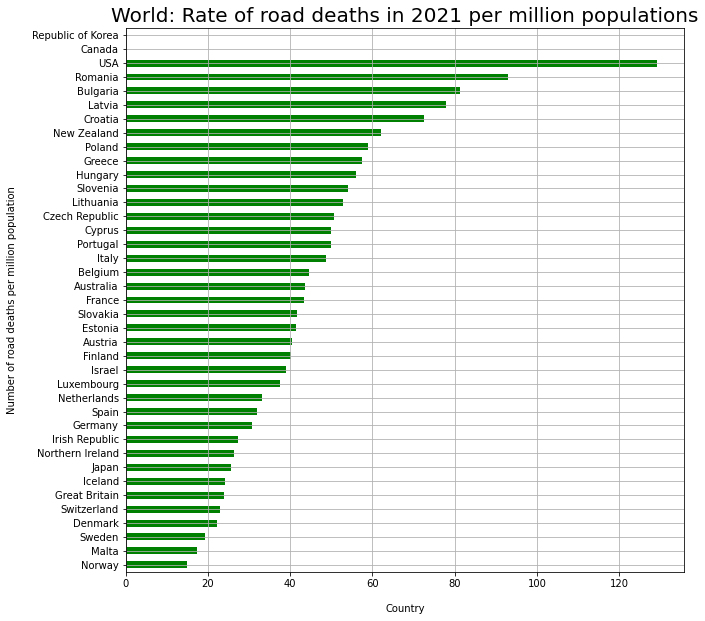

In [ ]:
df = df.drop(df.index[[2]]) # Remove data for United Kingdom, hence Northern Ireland,Great Britain is having the data.
df_rate = df[["Country","DeathsRate 2021"]].set_index("Country").sort_values(by=['DeathsRate 2021'])
df_rate.plot(kind='barh',figsize=(10, 10), legend=False, color='green', rot=0);
plt.title("World: Rate of road deaths in 2021 per million populations", fontsize=20)
plt.xlabel("Country", labelpad=15)
plt.ylabel("Number of road deaths per million population", labelpad=15)
plt.grid()
plt.show()

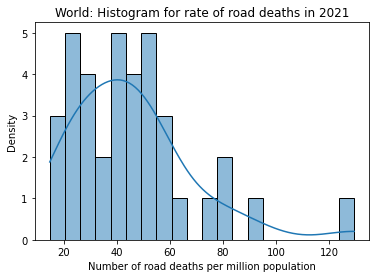

In [ ]:
sns.histplot(df_rate['DeathsRate 2021'] , bins=20, kde=True)
plt.title("World: Histogram for rate of road deaths in 2021")
plt.xlabel("Number of road deaths per million population")
plt.ylabel('Density')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

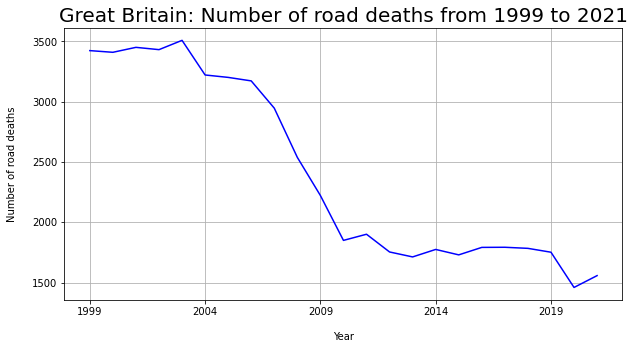

In [ ]:
df_Great_Britain = df.iloc[[0]].set_index("Country")
df_Great_Britain = df_Great_Britain.drop(columns=["DeathsRate 2021"])
df_Great_Britain.T.plot(kind='line',figsize=(10, 5), legend=False, color='blue', rot=0);
plt.title("Great Britain: Number of road deaths from 1999 to 2021", fontsize=20)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Number of road deaths", labelpad=15)
plt.grid()
plt.show()

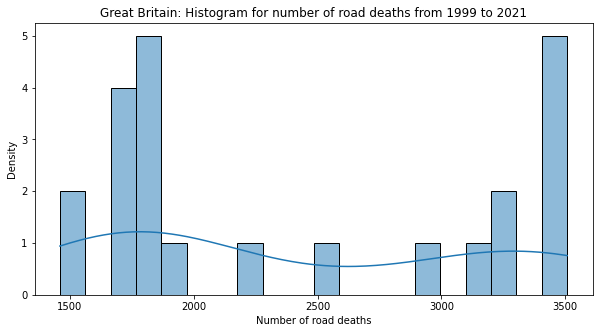

In [ ]:
df_Great_Britain_T = df_Great_Britain.T
sns.histplot(df_Great_Britain_T['Great Britain'] , bins=20, kde=True)
plt.title("Great Britain: Histogram for number of road deaths from 1999 to 2021")
plt.xlabel("Number of road deaths")
plt.ylabel('Density')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

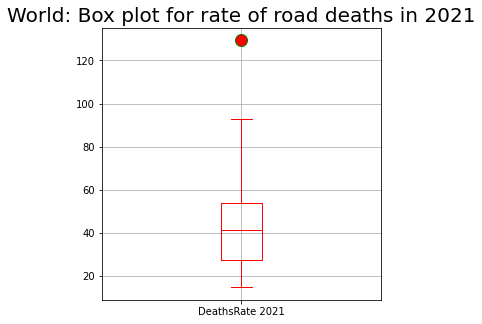

In [ ]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
df_rate.plot(kind='box',figsize=(5, 5), flierprops=flierprops, color='red');
plt.title("World: Box plot for rate of road deaths in 2021", fontsize=20)
plt.grid()
plt.show()

In [ ]:
df_rate.describe()

,DeathsRate 2021
count,37.000000
mean,45.574082
std,23.279649
min,14.792024
25%,27.337343
50%,41.528918
75%,54.105183
max,129.303431


In [ ]:
df_rate.median()

DeathsRate 2021    41.528918
dtype: float64

In [ ]:
skewValue = df_rate.skew(axis=0)
print(skewValue)
kurt = df_rate.kurt(axis=0 )
print(kurt)

DeathsRate 2021    1.535462
dtype: float64
DeathsRate 2021    3.563912
dtype: float64


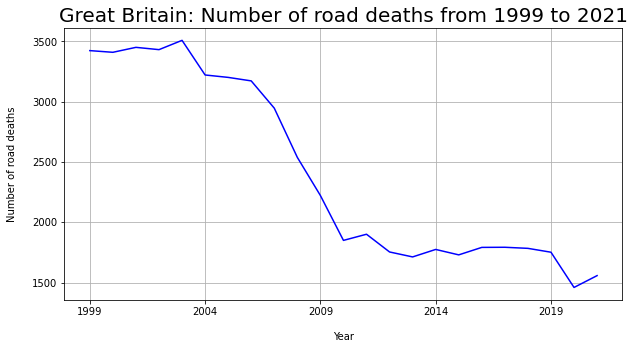

In [ ]:
df_Great_Britain = df.iloc[[0]].set_index("Country")
df_Great_Britain = df_Great_Britain.drop(columns=["DeathsRate 2021"])
df_Great_Britain.T.plot(kind='line',figsize=(10, 5), legend=False, color='blue', rot=0);
plt.title("Great Britain: Number of road deaths from 1999 to 2021", fontsize=20)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Number of road deaths", labelpad=15)
plt.grid()
plt.show()

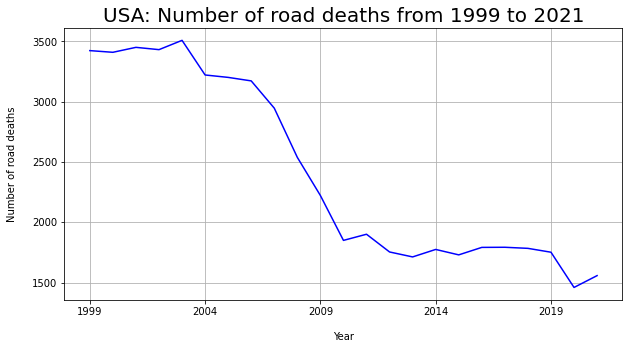

In [ ]:
df_USA = df.iloc[[0]]
df_USA = df_USA.set_index("Country").drop(columns=["DeathsRate 2021"])
df_USA.T.plot(kind='line',figsize=(10, 5), legend=False, color='blue', rot=0);
plt.title("USA: Number of road deaths from 1999 to 2021", fontsize=20)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Number of road deaths", labelpad=15)
plt.grid()
plt.show()

Data Set 2:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_stats = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Report/Final/Population_Vehicle_trafiic_Road_deaths_Great Britain.xlsx')
df_stats.head()
df_stats.tail()

,Great Britain,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,vehicle traffic,2.901550e+05,2.895510e+05,2.934590e+05,3.002370e+05,3.020410e+05,3.057060e+05,3.058440e+05,3.103730e+05,3.132940e+05,...,3.045590e+05,3.057590e+05,3.144900e+05,3.203880e+05,3.279260e+05,3.325040e+05,3.342130e+05,3.385960e+05,2.658940e+05,2.975590e+05
1,population,5.863520e+07,5.885004e+07,5.909202e+07,5.935569e+07,5.964980e+07,5.999585e+07,6.038374e+07,6.080370e+07,6.126068e+07,...,6.380873e+07,6.430230e+07,6.477350e+07,6.522436e+07,6.565520e+07,6.606480e+07,6.643299e+07,6.677866e+07,6.705947e+07,6.728104e+07
2,road deaths,3.423000e+03,3.409000e+03,3.450000e+03,3.431000e+03,3.508000e+03,3.221000e+03,3.201000e+03,3.172000e+03,2.946000e+03,...,1.754000e+03,1.713000e+03,1.775000e+03,1.730000e+03,1.792000e+03,1.793000e+03,1.784000e+03,1.752000e+03,1.460000e+03,1.558000e+03
3,death rate,5.837790e+01,5.792689e+01,5.838352e+01,5.780406e+01,5.880992e+01,5.368705e+01,5.301096e+01,5.216788e+01,4.808958e+01,...,2.748840e+01,2.663979e+01,2.740318e+01,2.652383e+01,2.729410e+01,2.714002e+01,2.685413e+01,2.623593e+01,2.177172e+01,2.315660e+01


In [ ]:
df_stats.shape

(4, 24)

In [ ]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Great Britain  4 non-null      object 
 1   1999           4 non-null      float64
 2   2000           4 non-null      float64
 3   2001           4 non-null      float64
 4   2002           4 non-null      float64
 5   2003           4 non-null      float64
 6   2004           4 non-null      float64
 7   2005           4 non-null      float64
 8   2006           4 non-null      float64
 9   2007           4 non-null      float64
 10  2008           4 non-null      float64
 11  2009           4 non-null      float64
 12  2010           4 non-null      float64
 13  2011           4 non-null      float64
 14  2012           4 non-null      float64
 15  2013           4 non-null      float64
 16  2014           4 non-null      float64
 17  2015           4 non-null      float64
 18  2016          

In [ ]:
df_stats.isna().any()

Great Britain    False
1999             False
2000             False
2001             False
2002             False
2003             False
2004             False
2005             False
2006             False
2007             False
2008             False
2009             False
2010             False
2011             False
2012             False
2013             False
2014             False
2015             False
2016             False
2017             False
2018             False
2019             False
2020             False
2021             False
dtype: bool

[1] The number of road deaths has been decreasing since 2003, despite rising population and vehicle traffic.

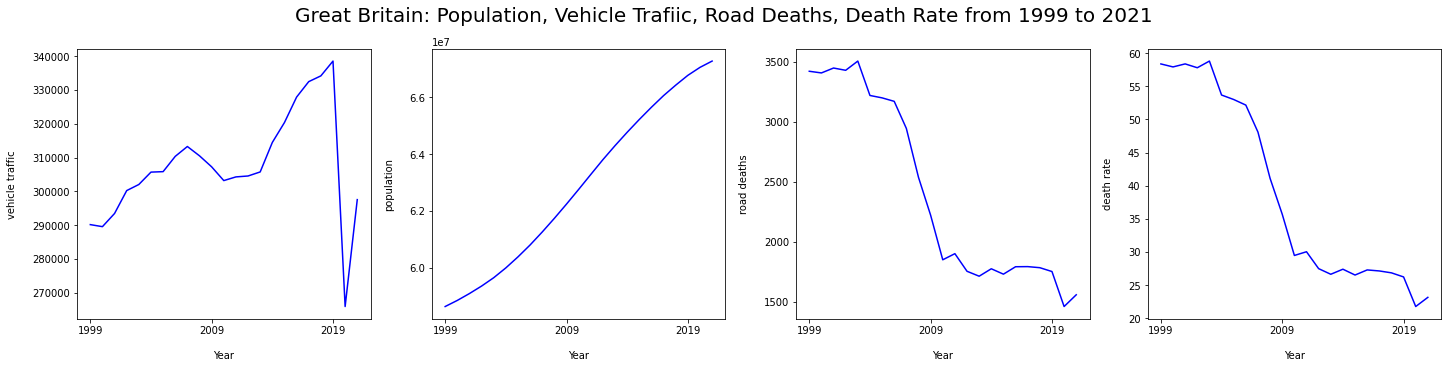

In [ ]:
df_stats_T = df_stats.set_index("Great Britain").T
ncols = 4
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(df_stats_T.columns, axs.T.ravel()):
    df_stats_T[[col]].plot(ax=ax, kind='line',figsize=(10, 5), legend=False, color='blue', rot=0);
    ax.set_xlabel('Year',labelpad=15)
    ax.set_ylabel(col,labelpad=15)

fig.suptitle('Great Britain: Population, Vehicle Trafiic, Road Deaths, Death Rate from 1999 to 2021', fontsize=20)
fig.set_size_inches(20, 5)



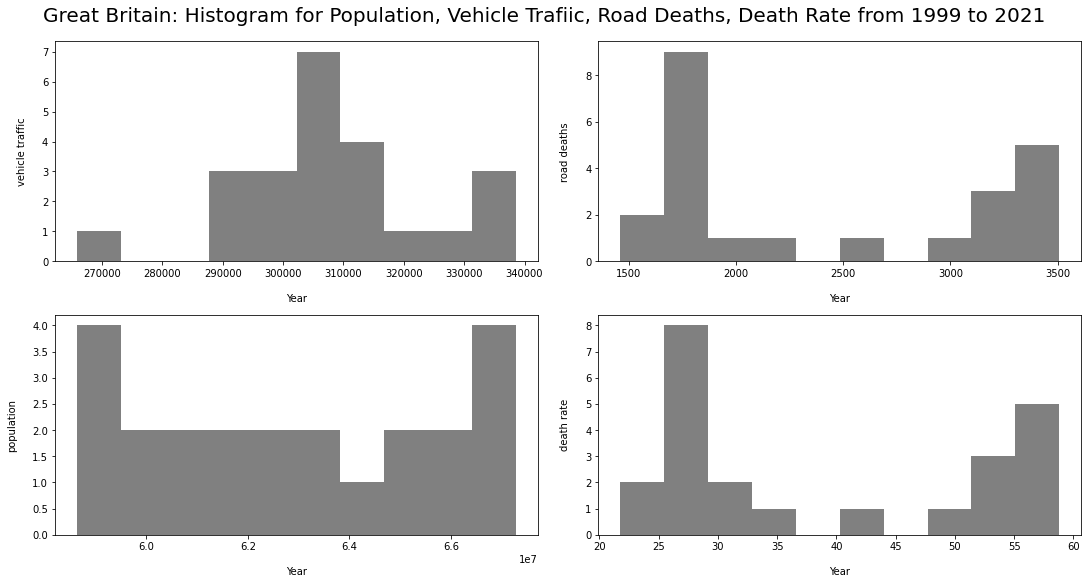

In [ ]:
ncols = 2
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(df_stats_T.columns, axs.T.ravel()):
   df_stats_T[[col]].plot(ax=ax, kind='hist',figsize=(10, 5), legend=False, color='gray', rot=0);
   ax.set_xlabel('Year',labelpad=15)
   ax.set_ylabel(col,labelpad=15)

fig.suptitle('Great Britain: Histogram for Population, Vehicle Trafiic, Road Deaths, Death Rate from 1999 to 2021', fontsize=20)
fig.set_size_inches(15, 8)


In [ ]:
df_stats_T

Great Britain,vehicle traffic,population,road deaths,death rate
1999,290155.0,58635202.0,3423.0,58.377901
2000,289551.0,58850043.0,3409.0,57.926891
2001,293459.0,59092016.0,3450.0,58.383522
2002,300237.0,59355690.0,3431.0,57.804062
2003,302041.0,59649799.0,3508.0,58.809922
2004,305706.0,59995851.0,3221.0,53.687046
2005,305844.0,60383741.0,3201.0,53.010959
2006,310373.0,60803700.0,3172.0,52.167878
2007,313294.0,61260676.0,2946.0,48.089577
2008,310530.0,61742151.0,2538.0,41.106440


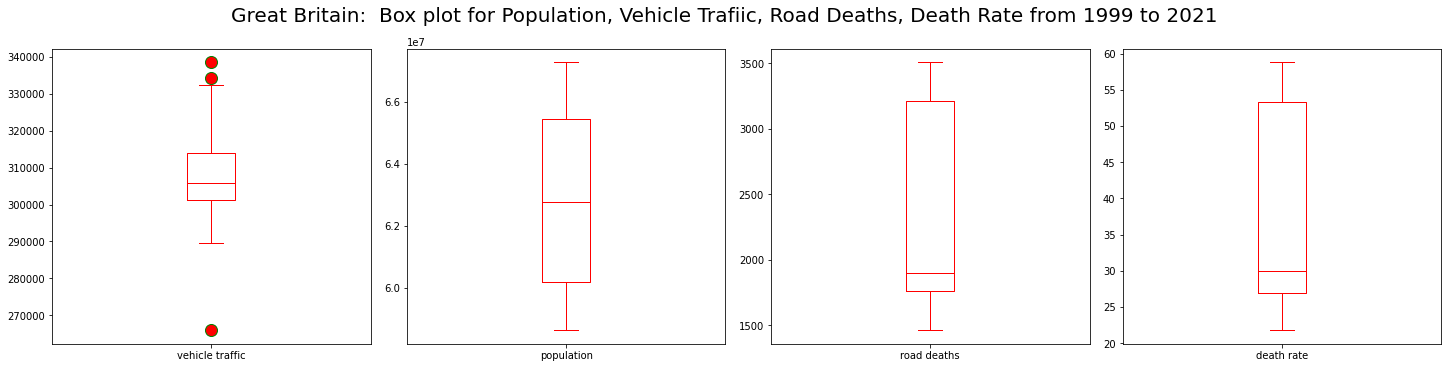

In [ ]:
df_stats_T = df_stats.set_index("Great Britain").T
ncols = 4
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
for col, ax in zip(df_stats_T.columns, axs.T.ravel()):
    df_stats_T[[col]].plot(ax=ax, kind='box',figsize=(5, 5), flierprops=flierprops, color='red');

fig.suptitle('Great Britain:  Box plot for Population, Vehicle Trafiic, Road Deaths, Death Rate from 1999 to 2021', fontsize=20)
fig.set_size_inches(20, 5)

[11]There is a positive relationship between vehicle traffic and the population.

Correlation between vehicle traffic and population, Great Britain : 0.38813085174390255


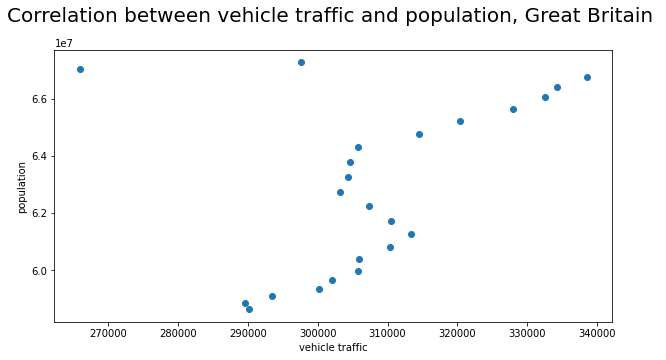

In [ ]:
df_stats_T = df_stats.set_index('Great Britain').T
column_0 = df_stats_T['vehicle traffic']
column_1 = df_stats_T['population']

correlation_1 = column_0.corr(column_1)
print('Correlation between vehicle traffic and population, Great Britain :',correlation_1)
column_2 = df_stats_T['road deaths']
plt.scatter(column_0, column_1)
plt.ylabel('population', fontsize=10)
plt.xlabel('vehicle traffic', fontsize=10)
plt.title('Correlation between vehicle traffic and population, Great Britain \n', fontsize=20)
plt.show()

Correlation between vehicle traffic and road deaths, Great Britain : -0.30455743603997415


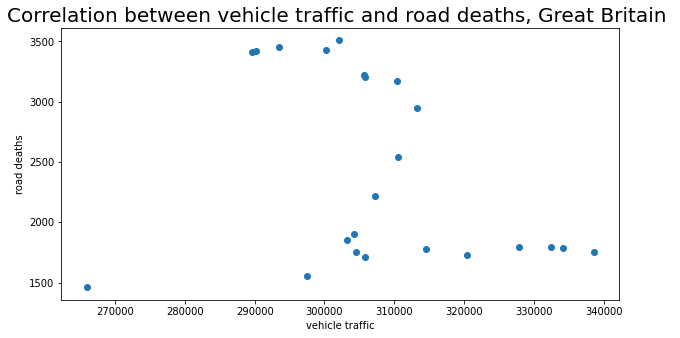

In [ ]:
column_2 = df_stats_T['road deaths']

correlation_2 = column_0.corr(column_2)
print('Correlation between vehicle traffic and road deaths, Great Britain :',correlation_2)
plt.scatter(column_0, column_2)
plt.ylabel('road deaths', fontsize=10)
plt.xlabel('vehicle traffic', fontsize=10)
plt.title('Correlation between vehicle traffic and road deaths, Great Britain ', fontsize=20)
plt.show()

[12] There is a strong negative relationship between population and road deaths.

Correlation between road death rate and population, Great Britain : -0.9414794184721537


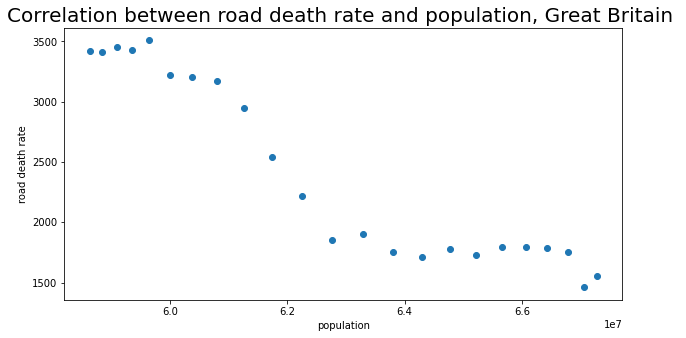

In [ ]:
correlation_3 = column_1.corr(column_2)
print('Correlation between road death rate and population, Great Britain :',correlation_3)
column_3 = df_stats_T['death rate']
plt.scatter(column_1, column_2)
plt.ylabel('road death rate', fontsize=10)
plt.xlabel('population', fontsize=10)
plt.title('Correlation between road death rate and population, Great Britain ', fontsize=20)
plt.show()

[13] There is a strong positive relationship between road deaths and death rate.


Correlation between road deaths and death rate, Great Britain : 0.9993977451204253


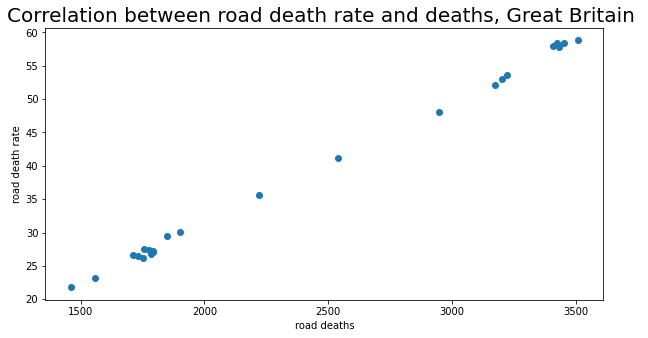

In [ ]:
correlation_4 = column_3.corr(column_2)
print('Correlation between road deaths and death rate, Great Britain :',correlation_4)
plt.scatter(column_2, column_3)
plt.ylabel('road death rate', fontsize=10)
plt.xlabel('road deaths', fontsize=10)
plt.title('Correlation between road death rate and deaths, Great Britain ', fontsize=20)
plt.show()

In [ ]:
correlation = df_stats_T.corr(method='pearson')
correlation

Great Britain,vehicle traffic,population,road deaths,death rate
Great Britain,,,,
vehicle traffic,1.000000,0.388131,-0.304557,-0.325512
population,0.388131,1.000000,-0.941479,-0.949827
road deaths,-0.304557,-0.941479,1.000000,0.999398
death rate,-0.325512,-0.949827,0.999398,1.000000


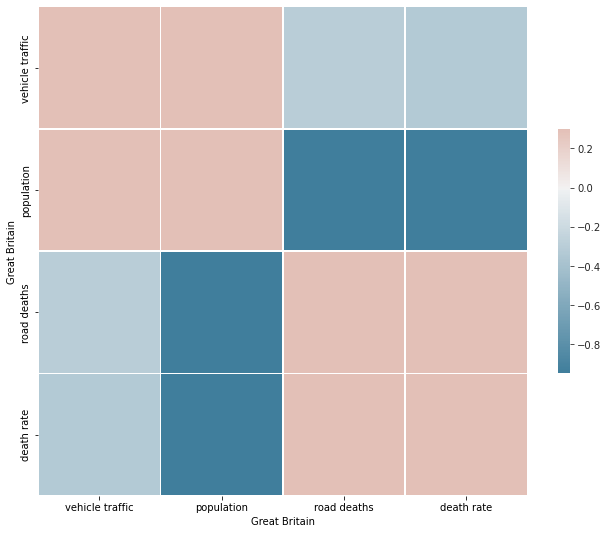

In [ ]:
#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
df_stats_T.describe()

Great Britain,vehicle traffic,population,road deaths,death rate
count,23.000000,2.300000e+01,23.000000,23.000000
mean,307731.869565,6.284520e+07,2407.956522,38.916778
std,16190.374956,2.933112e+06,772.454675,14.175958
min,265894.000000,5.863520e+07,1460.000000,21.771719
25%,301139.000000,6.018980e+07,1764.500000,26.997072
50%,305759.000000,6.276004e+07,1901.000000,30.038067
75%,313892.000000,6.543978e+07,3211.000000,53.349002
max,338596.000000,6.728104e+07,3508.000000,58.809922


[12] There is a strong positive relationship between road deaths and death rate.

Great Britain  road deaths
2008                2538.0
2020                1460.0
2021                1558.0
2015                1730.0
2009                2222.0
2010                1850.0
2005                3201.0
2017                1793.0
2001                3450.0
2007                2946.0
2003                3508.0
2004                3221.0
2014                1775.0
2006                3172.0
2019                1752.0
2016                1792.0
2018                1784.0
1999                3423.0


Great Britain  death rate
2008            41.106440
2020            21.771719
2021            23.156598
2015            26.523831
2009            35.698577
2010            29.477356
2005            53.010959
2017            27.140018
2001            58.383522
2007            48.089577
2003            58.809922
2004            53.687046
2014            27.403180
2006            52.167878
2019            26.235927
2016            27.294105
2018            26.854127
1999            5

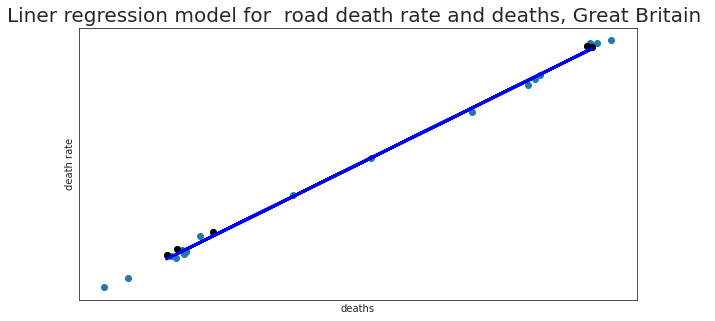

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Use only 1 feature - AGE to predict the target Y
deaths_x = df_stats_T[['road deaths']]
death_rate_y = df_stats_T[['death rate']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(deaths_x, death_rate_y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(deaths_x, death_rate_y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)


#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train.to_numpy(), y_train.to_numpy())

# Make predictions using the testing set
y_pred = regr.predict(x_test.to_numpy())
y_pred2 = regr.predict([[1600]])
print("\n")
print("The predicted Y value for deaths = 1600 is: ", y_pred2)

# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))

 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.ylabel('death rate', fontsize=10)
plt.xlabel('deaths', fontsize=10)
plt.title('Liner regression model for  road death rate and deaths, Great Britain ', fontsize=20)

plt.xticks(())
plt.yticks(())

plt.show()

[15] A multiple liner regression model provides a high-accuracy model for predicting death rates using vehicle traffic, population, and road deaths.

In [ ]:
import statsmodels.api as sm

#Use more than 1 feature - AGE to predict the target Y
_x = df_stats_T[['vehicle traffic',	'population',	'road deaths']]
_y = df_stats_T[['death rate']]

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(_x, _y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
print("\n")

#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train.to_numpy(), y_train.to_numpy())

# Make predictions using the testing set
y_pred = regr.predict(x_test.to_numpy())
print("Y test: ")
print(y_test)
print("\n")
print("Y Predicted: ")
print(y_pred)
#Make prediction for the following:
VT = 340000.0
PO = 70000000.0
RD = 1600.0
print("\n")
print ('Predicted Y value: ', regr.predict([[VT, PO, RD]]))
print("\n")

# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))


#Use statsmodel for model summary
_x = sm.add_constant(_x)
model = sm.OLS(_y, _x).fit()
predictions = model.predict(_x)
print_model = model.summary()
print(print_model)


Great Britain  vehicle traffic  population  road deaths
2020                  265894.0  67059474.0       1460.0
2005                  305844.0  60383741.0       3201.0
2000                  289551.0  58850043.0       3409.0
2019                  338596.0  66778659.0       1752.0
2008                  310530.0  61742151.0       2538.0
2001                  293459.0  59092016.0       3450.0
2012                  304559.0  63808727.0       1754.0
1999                  290155.0  58635202.0       3423.0
2007                  313294.0  61260676.0       2946.0
2011                  304287.0  63286362.0       1901.0
2014                  314490.0  64773504.0       1775.0
2013                  305759.0  64302297.0       1713.0
2002                  300237.0  59355690.0       3431.0
2006                  310373.0  60803700.0       3172.0
2004                  305706.0  59995851.0       3221.0
2016                  327926.0  65655203.0       1792.0
2003                  302041.0  59649799.0      

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[16]The linear regression model provides a low-accuracy model for predicting road collisions from road causalities. The model needs to be improved with a sufficient amount of data.


In [ ]:
df_stats_T = df_stats.set_index("Great Britain").T
df_stats_T.index = pd.DatetimeIndex(df_stats_T.index)
df_stats_T = df_stats_T.drop(columns=['vehicle traffic','population','road deaths'])
df_stats_T

Great Britain,death rate
1999-01-01,58.377901
2000-01-01,57.926891
2001-01-01,58.383522
2002-01-01,57.804062
2003-01-01,58.809922
2004-01-01,53.687046
2005-01-01,53.010959
2006-01-01,52.167878
2007-01-01,48.089577
2008-01-01,41.106440


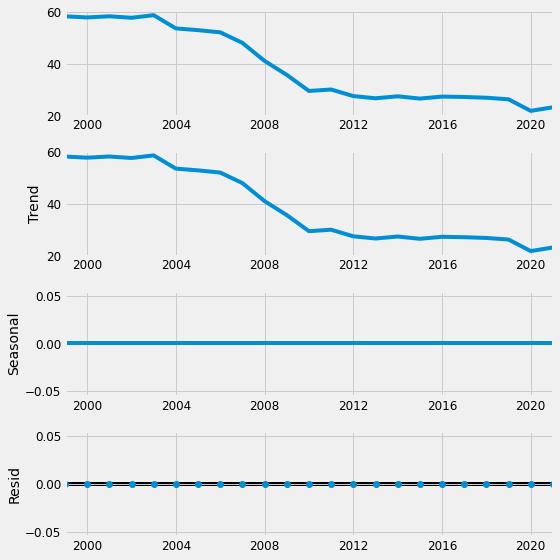

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 8, 8
decomposition = sm.tsa.seasonal_decompose(df_stats_T, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_stats_T,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
mod = sm.tsa.statespace.SARIMAX(df_stats_T,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:227.14466545467698
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:97.61695454236362
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:95.76908712079823
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:53.04156260702363
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:51.3907117310967
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:193.72269424527178
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:80.99348715362946
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:77.1377673983206
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:53.36866198971255
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:49.65734448701473
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:108.29979988959201
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:38.73725348574501
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:49.80716553419713
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4

Data Set 3:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Report/Final/Road-Casualties_Great Britain_Reigon.xlsx')
data.head()
data.tail()

,Accident year,Road user,Casualty sex,Urban rural,Built up roads,All casualties
2682,2021,Other vehicle,Female,Urban,Built up road,384
2683,2021,Other vehicle,Female,Urban,Non built up road,2
2684,2021,Other vehicle,Female,Rural,Motorway,4
2685,2021,Other vehicle,Female,Rural,Built up road,73
2686,2021,Other vehicle,Female,Rural,Non built up road,57


In [ ]:
data.isna().any()

Accident year     False
Road user         False
Casualty sex      False
Urban rural       False
Built up roads    False
All casualties    False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Accident year   2687 non-null   int64 
 1   Road user       2687 non-null   object
 2   Casualty sex    2687 non-null   object
 3   Urban rural     2687 non-null   object
 4   Built up roads  2687 non-null   object
 5   All casualties  2687 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 126.1+ KB


In [ ]:
data.shape

(2687, 6)

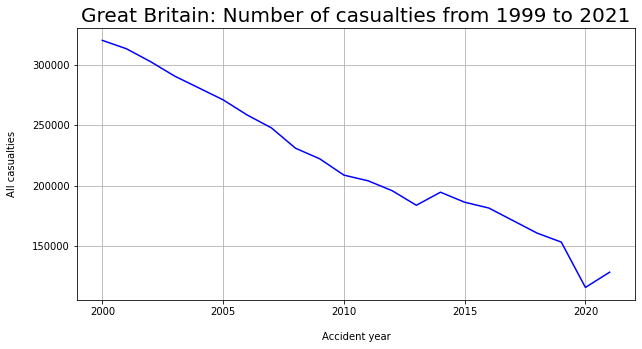

In [ ]:
data_AllCausalities_AccidentYear = data.groupby(['Accident year']).sum()
data_AllCausalities_AccidentYear.plot(kind='line',figsize=(10, 5), legend=False, color='blue', rot=0);
plt.title("Great Britain: Number of casualties from 1999 to 2021", fontsize=20)
plt.xlabel("Accident year", labelpad=15)
plt.ylabel("All casualties", labelpad=15)
plt.grid()
plt.show()

In [ ]:
data_AllCausalities_AccidentYear

,All casualties
Accident year,
2000,320283
2001,313309
2002,302605
2003,290607
2004,280840
2005,271017
2006,258404
2007,247780
2008,230905


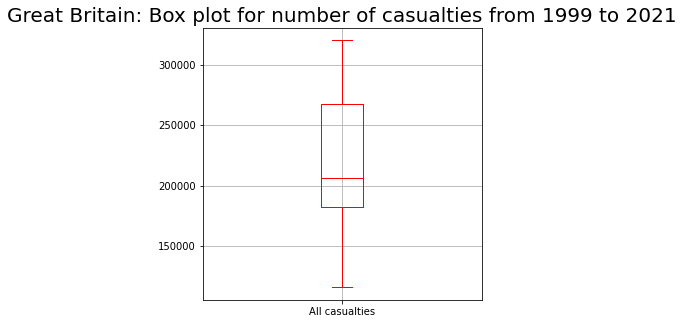

In [ ]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
data_AllCausalities_AccidentYear.plot(kind='box',figsize=(5, 5), flierprops=flierprops, color='red');
plt.title("Great Britain: Box plot for number of casualties from 1999 to 2021", fontsize=20)
plt.grid()
plt.show()

In [ ]:
from scipy import stats
stats.ttest_1samp(data_AllCausalities_AccidentYear['All casualties'], 0)

Ttest_1sampResult(statistic=17.250498224981282, pvalue=7.057630401562082e-14)

In [ ]:
data_AllCausalities_AccidentYear['All casualties'].describe()

count        22.000000
mean     219112.636364
std       59576.793051
min      115584.000000
25%      181955.500000
50%      206299.000000
75%      267863.750000
max      320283.000000
Name: All casualties, dtype: float64

In [ ]:
from scipy import stats
stats.ttest_1samp(data_AllCausalities_AccidentYear['All casualties'], 220000)

Ttest_1sampResult(statistic=-0.06986116861192783, pvalue=0.9449651553287055)

In [ ]:
data_AllCausalities_AccidentYear

,All casualties
Accident year,
2000,320283
2001,313309
2002,302605
2003,290607
2004,280840
2005,271017
2006,258404
2007,247780
2008,230905


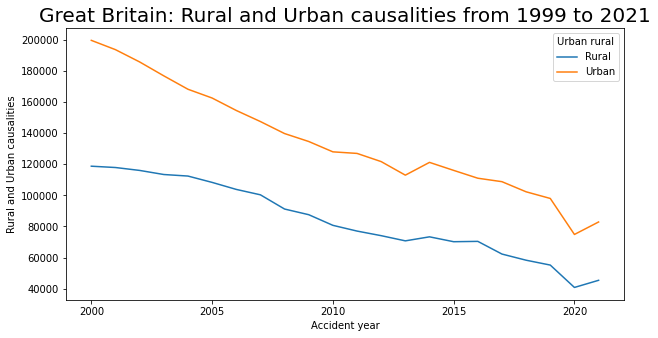

In [ ]:
data_AllCausalities_Urban_Rural = data.groupby(['Accident year','Urban rural']).sum().reset_index()
data_AllCausalities_Urban_Rural_T = data_AllCausalities_Urban_Rural.pivot(index='Accident year', columns='Urban rural', values='All casualties').T
data_AllCausalities_Urban_Rural_T =data_AllCausalities_Urban_Rural_T.drop(data_AllCausalities_Urban_Rural_T.index[[1,2]]).T.reset_index()
data_AllCausalities_Urban_Rural_T.plot(x="Accident year", y=["Rural", "Urban"], figsize=(10, 5))
plt.ylabel('Rural and Urban causalities', fontsize=10)
plt.xlabel('Accident year', fontsize=10)
plt.title('Great Britain: Rural and Urban causalities from 1999 to 2021', fontsize=20)
plt.show()

[3] Among the different gender types (female and male), both are at high risk, but males are the most vulnerable.


Text(0.5, 1.0, '\n Rural and Urban causalities, 2021')

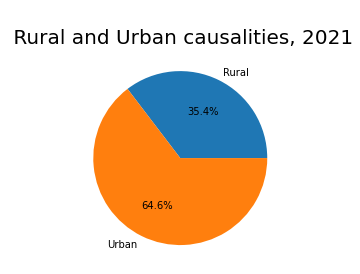

In [ ]:
labels = ["Rural", "Urban"]
values = data_AllCausalities_Urban_Rural_T.iloc[[21]].drop(columns=['Accident year']).values.ravel()
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.title("\n Rural and Urban causalities, 2021", fontsize=20)

[14] Urban, rural, and risk level have a relationship in terms of the number of causalities.


[2 2 2 2 2 0 0 0 0 0 3 3 3 3 3 3 3 3 1 1 1 1]


[[ 98227.4   147784.8  ]
 [ 49869.5    89477.75 ]
 [115673.8   184833.2  ]
 [ 72311.75  118314.625]]


Center for cluster 0 is  [ 98227.4 147784.8]
Center for cluster 1 is  [49869.5  89477.75]
Center for cluster 2 is  [115673.8 184833.2]
Center for cluster 3 is  [ 72311.75  118314.625]




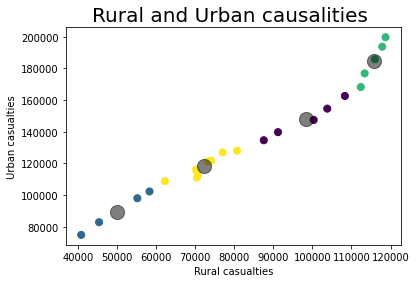

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
#Select columns for X
X = data_AllCausalities_Urban_Rural_T[["Rural","Urban"]]
#Perform Clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")
#Print off the labels of kmeans model
print(kmeans.cluster_centers_)
print("\n")
#Plot the graphs
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X["Rural"], X["Urban"], c=y_kmeans, s=50, cmap='viridis')
plt.ylabel('Urban casualties', fontsize=10)
plt.xlabel('Rural casualties', fontsize=10)
plt.title('Rural and Urban causalities ', fontsize=20)
centers = kmeans.cluster_centers_
print("Center for cluster 0 is ", centers[0])
print("Center for cluster 1 is ", centers[1])
print("Center for cluster 2 is ", centers[2])
print("Center for cluster 3 is ", centers[3])
print("\n")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

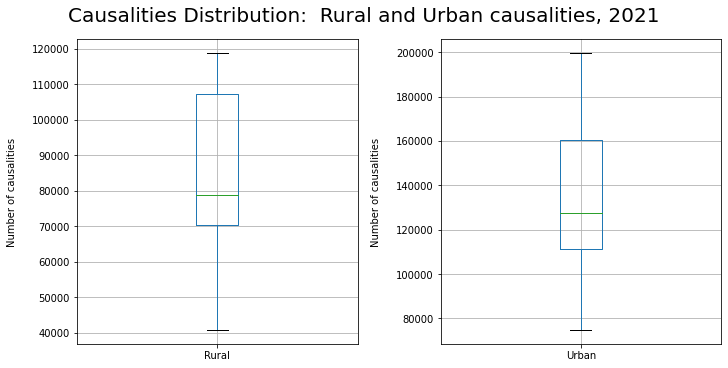

In [ ]:
ncols = 2
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(data_AllCausalities_Urban_Rural_T.drop(columns=["Accident year"]).columns, axs.T.ravel()):
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
    data_AllCausalities_Urban_Rural_T[[col]].boxplot(ax=ax, flierprops=flierprops);
    ax.set_ylabel('Number of causalities',labelpad=15)

fig.suptitle('Causalities Distribution:  Rural and Urban causalities, 2021', fontsize=20)
fig.set_size_inches(10, 5)

In [ ]:
skewValue = data_AllCausalities_Urban_Rural_T.set_index("Accident year").skew(axis=0)
print(skewValue)
kurt = data_AllCausalities_Urban_Rural_T.set_index("Accident year").kurt(axis=0 )
print(kurt)

Urban rural
Rural   -0.038665
Urban    0.306767
dtype: float64
Urban rural
Rural   -1.161705
Urban   -0.702687
dtype: float64


In [ ]:
correlation = data_AllCausalities_Urban_Rural_T.set_index('Accident year').corr(method='pearson')
correlation

Urban rural,Rural,Urban
Urban rural,,
Rural,1.00000,0.98384
Urban,0.98384,1.00000


In [ ]:
data_AllCausalities_Urban_Rural_T.drop(columns=["Accident year"]).describe()

Urban rural,Rural,Urban
count,22.000000,22.000000
mean,83976.272727,134887.181818
std,24420.172417,35018.771933
min,40745.000000,74822.000000
25%,70211.500000,111487.000000
50%,78847.500000,127451.500000
75%,107181.500000,160576.750000
max,118725.000000,199659.000000


In [ ]:
data_AllCausalities_Urban_Rural_T

Urban rural,Accident year,Rural,Urban
0,2000,118725.0,199659.0
1,2001,117875.0,193677.0
2,2002,116007.0,185779.0
3,2003,113377.0,176835.0
4,2004,112385.0,168216.0
5,2005,108309.0,162578.0
6,2006,103799.0,154573.0
7,2007,100320.0,147444.0
8,2008,91176.0,139716.0
9,2009,87533.0,134613.0


In [ ]:
t2, p = stats.ttest_ind(data_AllCausalities_Urban_Rural_T["Urban"], data_AllCausalities_Urban_Rural_T["Rural"])
print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))

p value = 1.52426e-06
t value = 5.59332


In [ ]:
pearsonCoeff_rvalue, p_value = stats.pearsonr(data_AllCausalities_Urban_Rural_T["Rural"], data_AllCausalities_Urban_Rural_T["Urban"])
#define the columns to perform calculations on
print("Pearson Correlation Coefficient r value : ", pearsonCoeff_rvalue.round(decimals=3), "and a P-value of:", p_value.round(decimals =3)) # Results
print("\n")

#Conduct Correlation Coefficient Hypothesis Testing
#Use 2 tail test
#Confidence level is 95%, alpha is 0.05 and alpha/2 is 0.025
alpha = 0.05
alpha_half = 0.025

if p_value < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("Conclusion drawn: The null hypothesis can be rejected")
else:
    print("Conclusion drawn: The null hypothesis is accepted")

Pearson Correlation Coefficient r value :  0.984 and a P-value of: 0.0


Conclusion drawn: The null hypothesis can be rejected


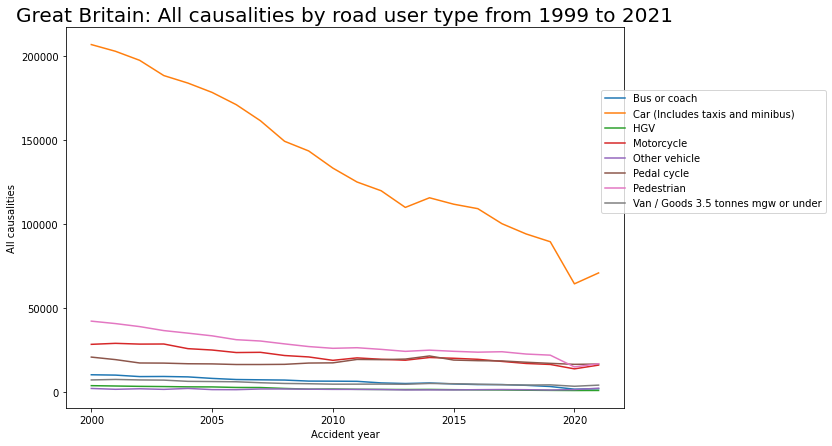

In [ ]:
data_AllCausalities_Road_User = data.groupby(['Accident year','Road user']).sum().reset_index()
data_AllCausalities_Road_User_T = data_AllCausalities_Road_User.pivot(index='Accident year', columns='Road user', values='All casualties').T
data_AllCausalities_Road_User_T =data_AllCausalities_Road_User_T.T.reset_index()
data_AllCausalities_Road_User_T.plot(x="Accident year", y=["Bus or coach","Car (Includes taxis and minibus)","HGV","Motorcycle","Other vehicle","Pedal cycle","Pedestrian","Van / Goods 3.5 tonnes mgw or under"], figsize=(10, 7))
plt.title('Great Britain: All causalities by road user type from 1999 to 2021', fontsize=20)
plt.ylabel('All causalities', fontsize=10)
plt.xlabel('Accident year', fontsize=10)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.show()

In [ ]:
data_AllCausalities_Road_User_T

Road user,Accident year,Bus or coach,Car (Includes taxis and minibus),HGV,Motorcycle,Other vehicle,Pedal cycle,Pedestrian,Van / Goods 3.5 tonnes mgw or under
0,2000,10088,206799,3597,28212,1935,20612,42033,7007
1,2001,9884,202802,3388,28810,1430,19114,40577,7304
2,2002,9005,197425,3178,28353,1746,17107,38784,7007
3,2003,9068,188342,3061,28411,1390,17033,36405,6897
4,2004,8820,183858,2883,25641,1943,16648,34881,6166
5,2005,7920,178302,2843,24824,1238,16561,33281,6048
6,2006,7253,171000,2530,23326,1203,16196,30982,5914
7,2007,7079,161433,2476,23459,1607,16195,30191,5340
8,2008,6929,149188,1930,21550,1616,16297,28482,4913
9,2009,6317,143412,1519,20703,1501,17064,26887,4743


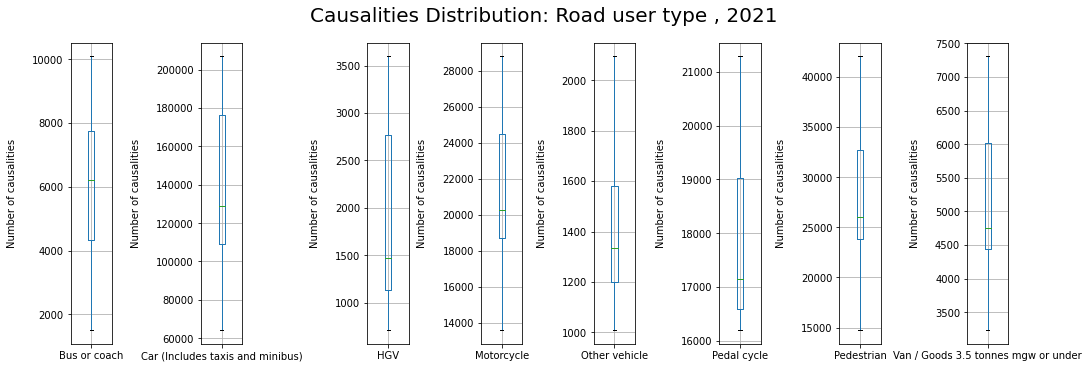

In [ ]:
ncols = 8
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(data_AllCausalities_Road_User_T.drop(columns=["Accident year"]).columns, axs.T.ravel()):
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
    data_AllCausalities_Road_User_T[[col]].boxplot(ax=ax, flierprops=flierprops);
    ax.set_ylabel('Number of causalities',labelpad=15)

fig.suptitle('Causalities Distribution: Road user type , 2021', fontsize=20)
fig.set_size_inches(15, 5)

[2] When it comes to road user types (pedestrian, bicycle, motorcycle, car, bus, coach, van, HGV, and other vehicle), the car is the most vulnerable and dangerous.


Text(0.5, 1.0, '\n Causalities by road user type, 2021')

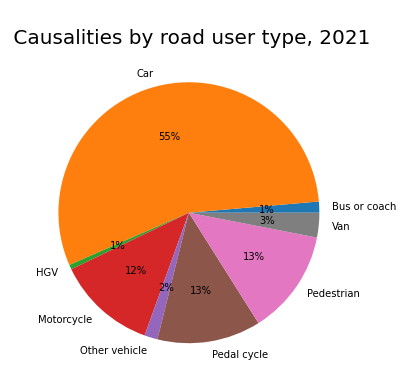

In [ ]:
labels = ["Bus or coach", "Car", "HGV", "Motorcycle", "Other vehicle", "Pedal cycle", "Pedestrian", "Van"]
plt.figure(figsize = (6, 6))
values = data_AllCausalities_Road_User_T.iloc[[21]].drop(columns=['Accident year']).values.ravel()
plt.pie(values, labels = labels, autopct='%1.0f%%')
plt.title("\n Causalities by road user type, 2021", fontsize=20)

In [ ]:
import scipy.stats as stats
stats.f_oneway(data_AllCausalities_Road_User_T["Bus or coach"],data_AllCausalities_Road_User_T["Car (Includes taxis and minibus)"],data_AllCausalities_Road_User_T["HGV"],data_AllCausalities_Road_User_T["Motorcycle"],data_AllCausalities_Road_User_T["Other vehicle"],data_AllCausalities_Road_User_T["Pedal cycle"],data_AllCausalities_Road_User_T["Pedestrian"],data_AllCausalities_Road_User_T["Van / Goods 3.5 tonnes mgw or under"])


F_onewayResult(statistic=185.66680623359917, pvalue=1.2894104732119707e-75)

In [ ]:
import scipy.stats as stats
fvalue, pvalue  = stats.f_oneway(data_AllCausalities_Road_User_T["Bus or coach"],data_AllCausalities_Road_User_T["Car (Includes taxis and minibus)"],data_AllCausalities_Road_User_T["HGV"],data_AllCausalities_Road_User_T["Motorcycle"],data_AllCausalities_Road_User_T["Other vehicle"],data_AllCausalities_Road_User_T["Pedal cycle"],data_AllCausalities_Road_User_T["Pedestrian"],data_AllCausalities_Road_User_T["Van / Goods 3.5 tonnes mgw or under"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))

alpha = 0.05

if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")


F Value  = 185.667 
P Value  = 1.28941e-75 
The null hypothesis can be rejected


In [ ]:
data_AllCausalities_Road_User_T.set_index('Accident year').describe()

Road user,Bus or coach,Car (Includes taxis and minibus),HGV,Motorcycle,Other vehicle,Pedal cycle,Pedestrian,Van / Goods 3.5 tonnes mgw or under
count,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000
mean,6062.500000,137494.090909,1856.500000,21377.00000,1404.636364,17812.318182,27980.318182,5125.272727
std,2465.565979,43411.652729,951.116074,4449.38183,305.057457,1499.055524,7242.094306,1164.368301
min,1506.000000,64255.000000,710.000000,13604.00000,1009.000000,16195.000000,14750.000000,3235.000000
25%,4341.000000,109231.250000,1129.500000,18702.50000,1200.000000,16582.750000,23862.000000,4435.500000
50%,6222.500000,129064.500000,1467.000000,20258.00000,1333.500000,17146.000000,26021.500000,4746.500000
75%,7753.250000,176476.500000,2764.750000,24482.75000,1580.500000,19029.250000,32706.250000,6014.500000
max,10088.000000,206799.000000,3597.000000,28810.00000,2094.000000,21287.000000,42033.000000,7304.000000


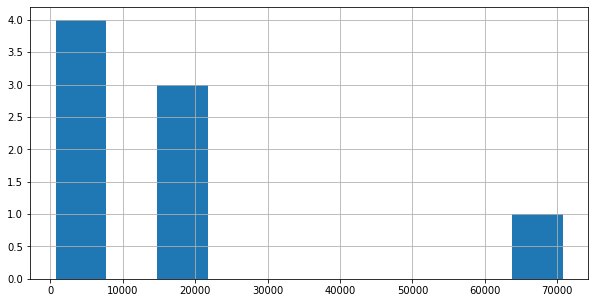

In [ ]:
data_AllCausalities_Road_User_2021 = data_AllCausalities_Road_User.loc[data_AllCausalities_Road_User['Accident year'] == 2021]
data_AllCausalities_Road_User_2021_cummulative = data_AllCausalities_Road_User_2021.drop(columns="Accident year").set_index("Road user")
data_AllCausalities_Road_User_2021_cummulative["All casualties"].hist(figsize=(10, 5))

In [ ]:
cas_2019 = data_AllCausalities_Road_User.loc[data_AllCausalities_Road_User['Accident year'] == 2019].set_index("Road user")['All casualties']
cas_2020 = data_AllCausalities_Road_User_2021['All casualties']
t2, p = stats.ttest_ind(cas_2019, cas_2020)
print("p value = {:g}".format(p))
print("t value = {:g}". format(t2))

p value = 0.817697
t value = 0.234887


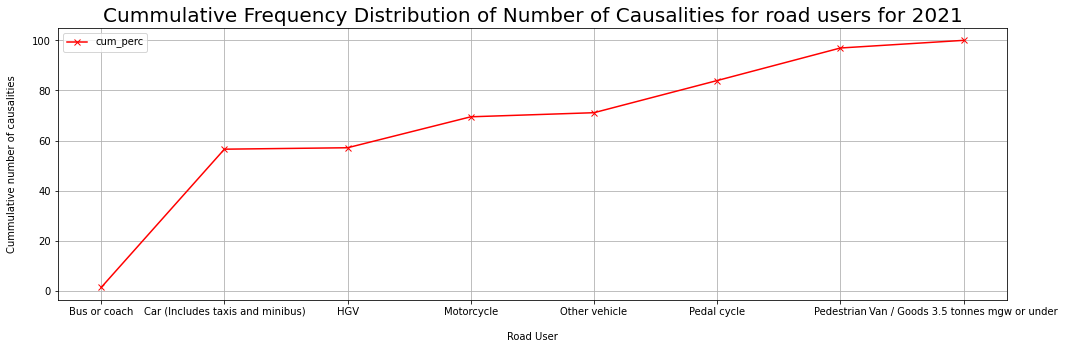

In [ ]:
data_AllCausalities_Road_User_2021_cummulative['cum_sum'] = data_AllCausalities_Road_User_2021_cummulative.cumsum()
data_AllCausalities_Road_User_2021_cummulative['cum_perc'] = 100*data_AllCausalities_Road_User_2021_cummulative['cum_sum']/data_AllCausalities_Road_User_2021_cummulative["All casualties"].sum()
data_AllCausalities_Road_User_2021_cummulative.plot(kind='line',y='cum_perc', figsize=(17, 5), legend=True, marker= "x", color='red', rot=0);
plt.title("Cummulative Frequency Distribution of Number of Causalities for road users for 2021", fontsize=20)
plt.xlabel("Road User", labelpad=15)
plt.ylabel("Cummulative number of causalities", labelpad=15)
plt.grid()
plt.show()

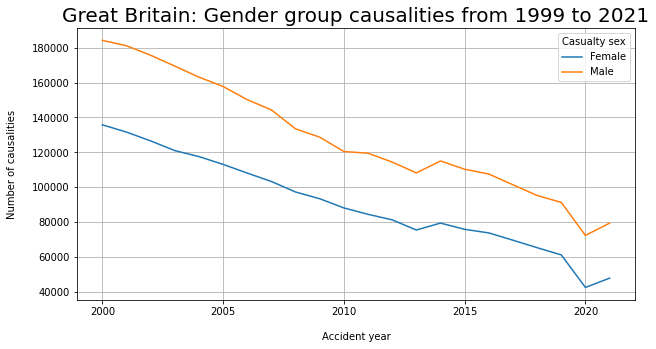

In [ ]:
data_AllCausalities_Gender_Group = data.groupby(['Accident year','Casualty sex']).sum().reset_index()
data_AllCausalities_Gender_Group_pivot = data_AllCausalities_Gender_Group.pivot(index='Accident year', columns='Casualty sex', values='All casualties').drop(columns="Unknown").reset_index()
data_AllCausalities_Gender_Group_pivot.plot(x="Accident year", y=["Female","Male"], figsize=(10, 5))
plt.title('Great Britain: Gender group causalities from 1999 to 2021', fontsize=20)
plt.xlabel("Accident year", labelpad=15)
plt.ylabel("Number of causalities", labelpad=15)
plt.grid()
plt.show()

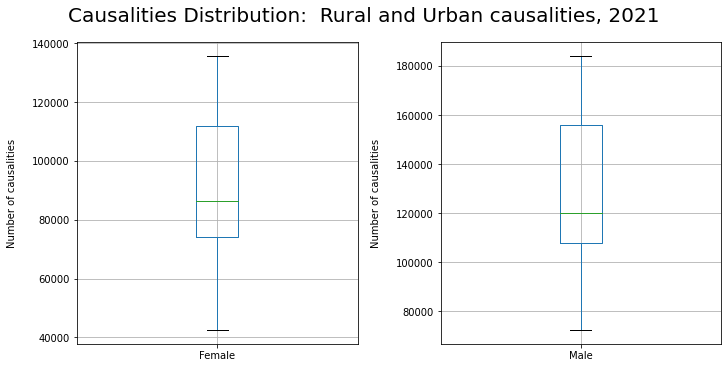

In [ ]:
ncols = 2
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(data_AllCausalities_Gender_Group_pivot.drop(columns=["Accident year"]).columns, axs.T.ravel()):
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
    data_AllCausalities_Gender_Group_pivot[[col]].boxplot(ax=ax, flierprops=flierprops);
    ax.set_ylabel('Number of causalities',labelpad=15)

fig.suptitle('Causalities Distribution:  Rural and Urban causalities, 2021', fontsize=20)
fig.set_size_inches(10, 5)

[4]Considering area (urban or rural), urban areas are the most vulnerable and high-risk category.


Text(0.5, 1.0, '\n Gender group causalities, 2021')

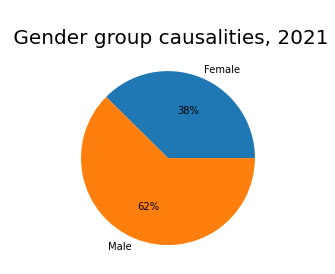

In [ ]:
labels = ["Female", "Male"]
values = data_AllCausalities_Gender_Group_pivot.iloc[[21]].drop(columns=['Accident year']).values.ravel()
plt.pie(values, labels = labels, autopct='%1.0f%%')
plt.title("\n Gender group causalities, 2021", fontsize=20)

In [ ]:
skewValue = data_AllCausalities_Gender_Group_pivot.set_index("Accident year").skew(axis=0)
print(skewValue)
kurt = data_AllCausalities_Gender_Group_pivot.set_index("Accident year").kurt(axis=0 )
print(kurt)

Casualty sex
Female    0.061408
Male      0.217792
dtype: float64
Casualty sex
Female   -0.828875
Male     -0.980667
dtype: float64


In [ ]:
data_AllCausalities_Gender_Group_pivot = data_AllCausalities_Gender_Group_pivot.set_index("Accident year")
correlation = data_AllCausalities_Gender_Group_pivot.corr(method='pearson')
correlation

Casualty sex,Female,Male
Casualty sex,,
Female,1.000000,0.997561
Male,0.997561,1.000000


In [ ]:
data_AllCausalities_Gender_Group_pivot

Casualty sex,Female,Male
Accident year,,
2000,135803,184259
2001,131631,181167
2002,126583,175706
2003,121001,169492
2004,117573,163173
2005,113087,157797
2006,108111,150212
2007,103292,144363
2008,97250,133478


In [ ]:
stats.ttest_ind(data_AllCausalities_Gender_Group_pivot['Male'], data_AllCausalities_Gender_Group_pivot['Female'])

Ttest_indResult(statistic=4.172481427056453, pvalue=0.00014798491110957495)

In [ ]:
data_AllCausalities_Gender_Group_pivot.describe()

Casualty sex,Female,Male
count,22.000000,22.000000
mean,90562.318182,128342.636364
std,26529.272634,33164.753974
min,42488.000000,72335.000000
25%,74193.500000,107720.250000
50%,86281.000000,119994.000000
75%,111843.000000,155900.750000
max,135803.000000,184259.000000


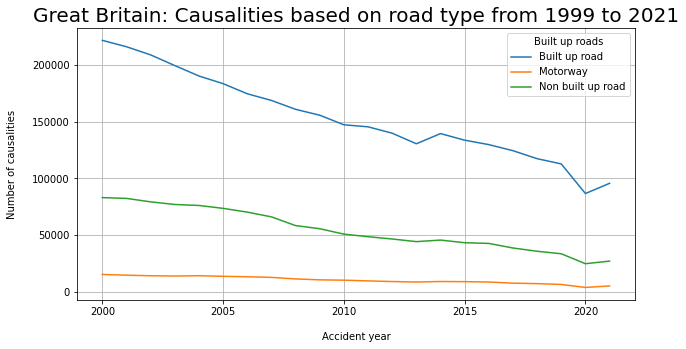

In [ ]:
data_AllCausalities_Road_Type = data.groupby(['Accident year','Built up roads']).sum().reset_index()
data_AllCausalities_Road_Type_T = data_AllCausalities_Road_Type.pivot(index='Accident year', columns='Built up roads', values='All casualties').T
data_AllCausalities_Road_Type_T =data_AllCausalities_Road_Type_T.drop(data_AllCausalities_Road_Type_T.index[[3]]).T.reset_index()
data_AllCausalities_Road_Type_T.plot(x="Accident year", y=["Built up road","Motorway","Non built up road"], figsize=(10, 5))
plt.title('Great Britain: Causalities based on road type from 1999 to 2021', fontsize=20)
plt.xlabel("Accident year", labelpad=15)
plt.ylabel("Number of causalities", labelpad=15)
plt.grid()
plt.show()

[5] Considering road type (built-up road, non-built-up road, highway) build up roads are the most vulnerable high-risk category.


Text(0.5, 1.0, '\n Causalities based on road type, 2021')

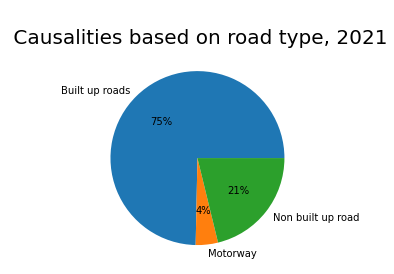

In [ ]:
labels = ["Built up roads", "Motorway","Non built up road"]
values = data_AllCausalities_Road_Type_T.iloc[[21]].drop(columns=['Accident year']).values.ravel()
plt.pie(values, labels = labels, autopct='%1.0f%%')
plt.title("\n Causalities based on road type, 2021", fontsize=20)

[0 0 0 ... 0 0 0]


The kmeans labels are: 
[0 0 0 ... 0 0 0]


[[  435.91437803]
 [33891.45283019]
 [12309.53797468]]


Center for cluster 0 is  [435.91437803]
Center for cluster 1 is  [33891.45283019]
Center for cluster 2 is  [12309.53797468]




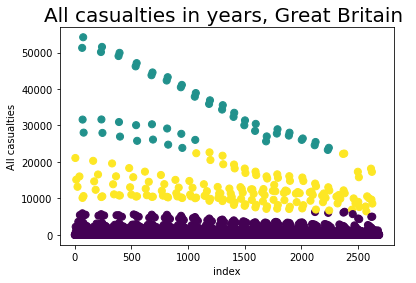

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
#Select columns for X
X = data[["All casualties"]]
#Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")
#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")
#Plot the graphs
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X.index, X["All casualties"], c=y_kmeans, s=50, cmap='viridis')
plt.ylabel('All casualties', fontsize=10)
plt.xlabel('index', fontsize=10)
plt.title('All casualties in years, Great Britain ', fontsize=20)
centers = kmeans.cluster_centers_
print("Center for cluster 0 is ", centers[0])
print("Center for cluster 1 is ", centers[1])
print("Center for cluster 2 is ", centers[2])
print("\n")


In [ ]:
data

,Accident year,Road user,Casualty sex,Urban rural,Built up roads,All casualties
0,2000,Pedestrian,Unknown,Urban,Built up road,43
1,2000,Pedestrian,Unknown,Rural,Built up road,5
2,2000,Pedestrian,Unknown,Rural,Non built up road,2
3,2000,Pedestrian,Unknown,Unallocated,Non built up road,1
4,2000,Pedestrian,Male,Urban,Motorway,15
...,...,...,...,...,...,...
2682,2021,Other vehicle,Female,Urban,Built up road,384
2683,2021,Other vehicle,Female,Urban,Non built up road,2
2684,2021,Other vehicle,Female,Rural,Motorway,4
2685,2021,Other vehicle,Female,Rural,Built up road,73


In [ ]:
data_risk_group = data

# Add a new column named 'All casualties'
rating = []
for row in data['All casualties']:
    if row <= 435 :    rating.append('Low Risk')
    elif 435 < row <= 12309:   rating.append('Medium Risk')
    elif 12309 < row <= 33891:   rating.append('High Risk')
    elif row > 33891:  rating.append('Extremely High')
    else:           rating.append('Not_Rated')

data_risk_group['Rating'] = rating
data_risk_group

,Accident year,Road user,Casualty sex,Urban rural,Built up roads,All casualties,Rating
0,2000,Pedestrian,Unknown,Urban,Built up road,43,Low Risk
1,2000,Pedestrian,Unknown,Rural,Built up road,5,Low Risk
2,2000,Pedestrian,Unknown,Rural,Non built up road,2,Low Risk
3,2000,Pedestrian,Unknown,Unallocated,Non built up road,1,Low Risk
4,2000,Pedestrian,Male,Urban,Motorway,15,Low Risk
...,...,...,...,...,...,...,...
2682,2021,Other vehicle,Female,Urban,Built up road,384,Low Risk
2683,2021,Other vehicle,Female,Urban,Non built up road,2,Low Risk
2684,2021,Other vehicle,Female,Rural,Motorway,4,Low Risk
2685,2021,Other vehicle,Female,Rural,Built up road,73,Low Risk


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
data_risk_group_2021 = data_risk_group.loc[data_risk_group["Accident year"] == 2021]
data_risk_group_2021_updated = data_risk_group_2021.drop(columns=["All casualties","Accident year"])
le_class = LabelEncoder()
le_features = LabelEncoder()
data_risk_group_2021_updated['Rating'] = le_class.fit_transform(data_risk_group_2021_updated["Rating"])
X = data_risk_group_2021_updated[["Built up roads"]].apply(le_features.fit_transform)
y = data_risk_group_2021_updated["Rating"]

#Build and fit classififier
neigh = KNeighborsClassifier(n_neighbors=3)
model = neigh.fit(X.to_numpy(), y)
print(model)

#Use model for prediction
print("Predicted classification is", neigh.predict([[0]]))
print("Predicted probabilities are", neigh.predict_proba([[0.9]]))

KNeighborsClassifier(n_neighbors=3)
Predicted classification is [1]
Predicted probabilities are [[0. 1. 0.]]


In [ ]:
le_name_mapping = dict(zip(le_class.classes_, le_class.transform(le_class.classes_)))
print(le_name_mapping)
data_risk_group_2021_updated[["Built up roads"]].apply(le_features.fit_transform)
le_name_mapping = dict(zip(le_features.classes_, le_features.transform(le_features.classes_)))
print(le_name_mapping)
data_risk_group_2021_updated[["Urban rural"]].apply(le_features.fit_transform)
le_name_mapping = dict(zip(le_features.classes_, le_features.transform(le_features.classes_)))
print(le_name_mapping)
data_risk_group_2021_updated[["Casualty sex"]].apply(le_features.fit_transform)
le_name_mapping = dict(zip(le_features.classes_, le_features.transform(le_features.classes_)))
print(le_name_mapping)
data_risk_group_2021_updated[["Road user"]].apply(le_features.fit_transform)
le_name_mapping = dict(zip(le_features.classes_, le_features.transform(le_features.classes_)))
print(le_name_mapping)

{'High Risk': 0, 'Low Risk': 1, 'Medium Risk': 2}
{'Built up road': 0, 'Motorway': 1, 'Non built up road': 2}
{'Rural': 0, 'Unallocated': 1, 'Urban': 2}
{'Female': 0, 'Male': 1, 'Unknown': 2}
{'Bus or coach': 0, 'Car (Includes taxis and minibus)': 1, 'HGV': 2, 'Motorcycle': 3, 'Other vehicle': 4, 'Pedal cycle': 5, 'Pedestrian': 6, 'Van / Goods 3.5 tonnes mgw or under': 7}


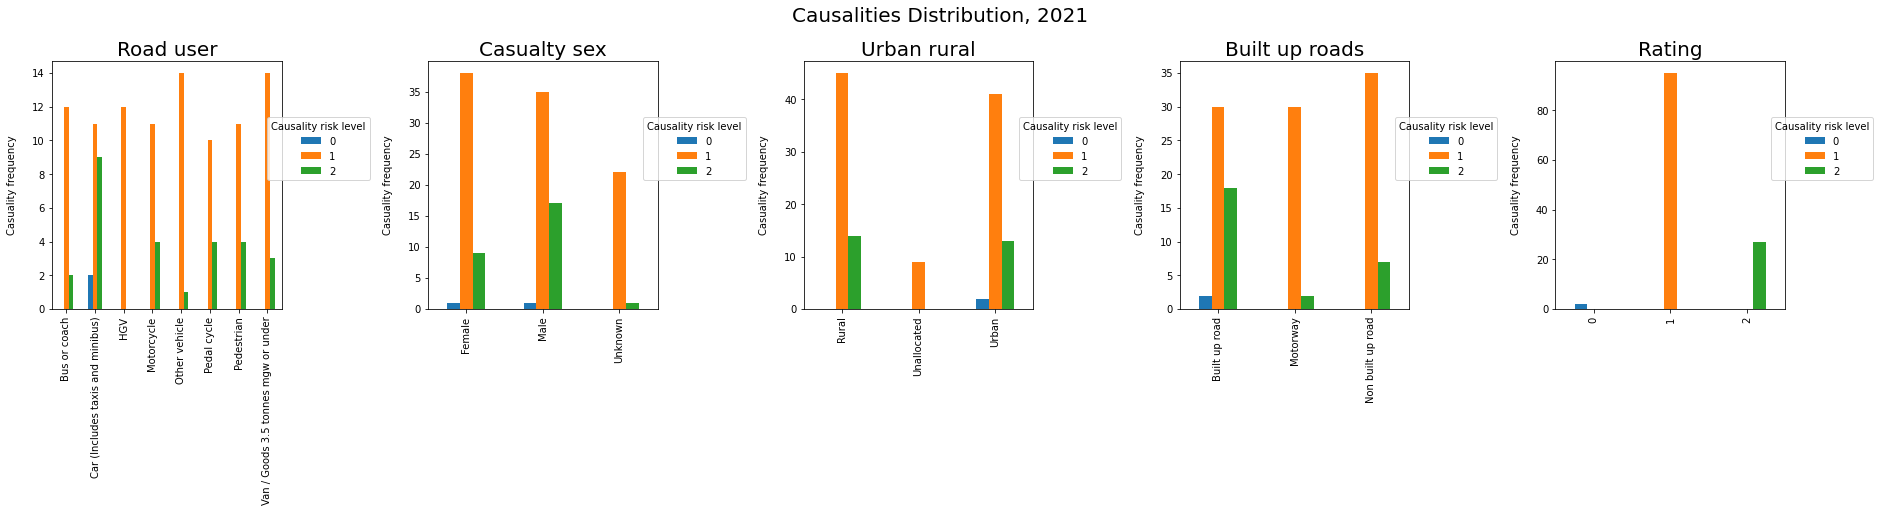

In [ ]:
ncols = 5
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(data_risk_group_2021_updated.columns, axs.T.ravel()):
   CrosstabResult=pd.crosstab(index=data_risk_group_2021_updated[[col]][col].values,columns=y.values)
   CrosstabResult.plot(ax=ax, kind='bar', figsize=(17, 5), legend=True);
   ax.set_ylabel('Casuality frequency',labelpad=15)
   ax.set_xlabel('')
   ax.set_title(col, fontsize=20)
   ax.legend(title='Causality risk level',loc='lower center', bbox_to_anchor=(1.16, 0.5))
fig.suptitle('Causalities Distribution, 2021', fontsize=20)
fig.set_size_inches(26,7)


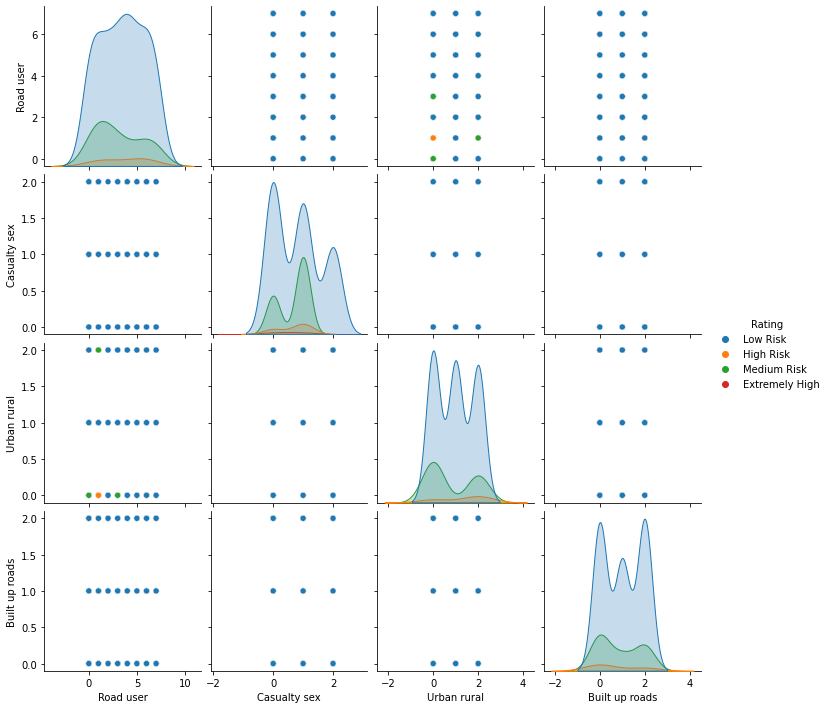

In [ ]:
data_risk_group_2000 = data_risk_group.loc[data_risk_group["Accident year"] == 2000]
data_risk_group_2000_filtered = data_risk_group_2000.drop(columns=["All casualties","Accident year"])
le_features = LabelEncoder()
data_risk_group_2000_filtered.iloc[:,0 : 4] = data_risk_group_2000_filtered.iloc[:,0 : 4].apply(le_features.fit_transform)
sns.pairplot(data_risk_group_2000_filtered , hue='Rating')

In [ ]:
data_risk_group_2000_filtered

,Road user,Casualty sex,Urban rural,Built up roads,Rating
0,6,2,2,0,Low Risk
1,6,2,0,0,Low Risk
2,6,2,0,2,Low Risk
3,6,2,1,2,Low Risk
4,6,1,2,1,Low Risk
...,...,...,...,...,...
152,4,0,0,1,Low Risk
153,4,0,0,0,Low Risk
154,4,0,0,2,Low Risk
155,4,0,1,0,Low Risk


[17]KNN does not predict causality risk levels well.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.72      1.00      0.84        36
           2       0.00      0.00      0.00        12

    accuracy                           0.72        50
   macro avg       0.24      0.33      0.28        50
weighted avg       0.52      0.72      0.60        50

[[ 0  2  0]
 [ 0 36  0]
 [ 0 12  0]]


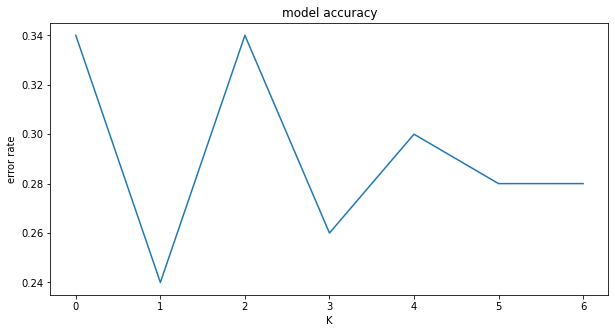

Predicted classification is [1]
Predicted probabilities are [[0.625 0.375]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X = data_risk_group_2021_updated.drop(["Rating"], axis=1).apply(le_features.fit_transform)
#Split the data set into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Performance measurement
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Selecting an optimal K value
error_rates = []
for i in np.arange(1, 8):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

plt.figure(figsize=(10,5))
plt.plot(error_rates)
plt.title('model accuracy')
plt.ylabel('error rate')
plt.xlabel('K')
plt.show()

#Use model for prediction
print("Predicted classification is", model.predict([[6,2,2,0]]))
print("Predicted probabilities are", model.predict_proba([[0.9,0.1,0.3,0.4]]))


cm = confusion_matrix(y_test, y_pred)


In [ ]:
y_test.value_counts()

1    36
2    12
0     2
Name: Rating, dtype: int64

                precision    recall  f1-score   support

Extremely High       0.38      1.00      0.55         3
     High Risk       0.89      0.42      0.57        19
      Low Risk       0.98      0.97      0.98       401
   Medium Risk       0.87      0.93      0.90       115

      accuracy                           0.94       538
     macro avg       0.78      0.83      0.75       538
  weighted avg       0.95      0.94      0.94       538

[[  3   0   0   0]
 [  5   8   0   6]
 [  0   1 390  10]
 [  0   0   8 107]]


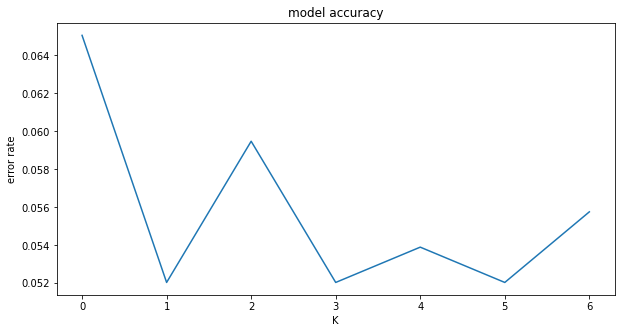

Predicted classification is ['Low Risk']
Predicted probabilities are [[0. 0. 0. 1.]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
data_risk_group_updated = data_risk_group.drop(columns=["All casualties","Accident year"])
le_features = LabelEncoder()
X = data_risk_group_updated.drop(["Rating"], axis=1).apply(le_features.fit_transform)
y = data_risk_group_updated["Rating"]
#Split the data set into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Performance measurement
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Selecting an optimal K value
error_rates = []
for i in np.arange(1, 8):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

plt.figure(figsize=(10,5))
plt.plot(error_rates)
plt.title('model accuracy')
plt.ylabel('error rate')
plt.xlabel('K')
plt.show()

#Use model for prediction
print("Predicted classification is", model.predict([[6,2,2,0]]))
print("Predicted probabilities are", model.predict_proba([[0.9,0.1,0.3,0.4]]))


cm = confusion_matrix(y_test, y_pred)


In [ ]:
y_test.value_counts()

Low Risk          398
Medium Risk       114
High Risk          20
Extremely High      6
Name: Rating, dtype: int64

In [ ]:
X

,Road user,Casualty sex,Urban rural,Built up roads
0,6,2,3,0
1,6,2,0,0
2,6,2,0,2
3,6,2,1,2
4,6,1,3,1
...,...,...,...,...
2682,4,0,3,0
2683,4,0,3,2
2684,4,0,0,1
2685,4,0,0,0


In [ ]:
a = data_risk_group_2021_updated['Rating'].unique()
print(sorted(a))

[0, 1, 2]


[19] ExtraTreesClassifier is useful for determining the importance of various factors in determining causality risk level.


Importance of features:
[0.50086911 0.18918473 0.14811213 0.16183403]


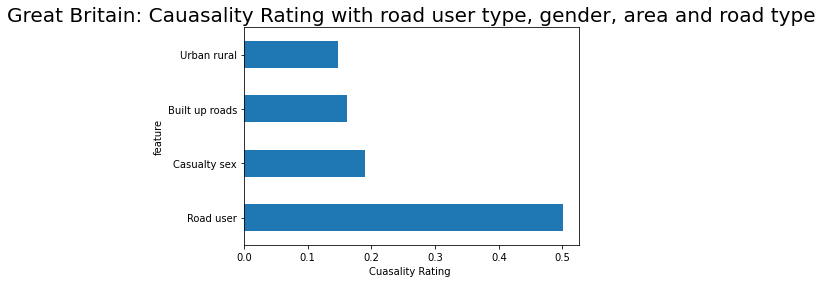

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#Build the model
model = ExtraTreesClassifier()
model.fit(X,y)

#Use inbuilt feature_importances of tree-based classifiers
print('Importance of features:')
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Great Britain: Cauasality Rating with road user type, gender, area and road type', fontsize=20)
plt.ylabel('feature', fontsize=10)
plt.xlabel('Cuasality Rating ', fontsize=10)
plt.show()

In [ ]:
data_risk_group

,Accident year,Road user,Casualty sex,Urban rural,Built up roads,All casualties,Rating
0,2000,Pedestrian,Unknown,Urban,Built up road,43,Low Risk
1,2000,Pedestrian,Unknown,Rural,Built up road,5,Low Risk
2,2000,Pedestrian,Unknown,Rural,Non built up road,2,Low Risk
3,2000,Pedestrian,Unknown,Unallocated,Non built up road,1,Low Risk
4,2000,Pedestrian,Male,Urban,Motorway,15,Low Risk
...,...,...,...,...,...,...,...
2682,2021,Other vehicle,Female,Urban,Built up road,384,Low Risk
2683,2021,Other vehicle,Female,Urban,Non built up road,2,Low Risk
2684,2021,Other vehicle,Female,Rural,Motorway,4,Low Risk
2685,2021,Other vehicle,Female,Rural,Built up road,73,Low Risk


In [ ]:
crosstab = pd.crosstab(data_risk_group["Built up roads"], data_risk_group["Rating"])
w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

alpha = 0.01 #alpha is 0.01 or level of confidence is 99%
if x < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected, Built up roads and Rating have a relationship. Knowing the value of one variable does help you predict the value of another variable.")
else:
    print("The null hypothesis is accepted, Built up roads and Rating have no relationship. It does not help you predict the value of another variable")


The Chi Square value is: 194.89533459794126
The pvalue is: 3.8885579076107004e-37
The value for degree of freedom is : 9
Expected cell counts is: [[7.72608857e+00 3.59263119e+01 7.53679940e+02 2.40667659e+02]
 [5.19538519e+00 2.41585411e+01 5.06809825e+02 1.61836249e+02]
 [6.81801265e+00 3.17037588e+01 6.65097134e+02 2.12381094e+02]
 [2.60513584e-01 1.21138817e+00 2.54131001e+01 8.11499814e+00]]


The null hypothesis can be rejected, Built up roads and Rating have a relationship. Knowing the value of one variable does help you predict the value of another variable.


In [ ]:
a = data_risk_group["Built up roads"].unique()
print(sorted(a))

['Built up road', 'Motorway', 'Non built up road', 'Unknown']


In [ ]:
b = data_risk_group["Rating"].unique()
print(sorted(b))

['Extremely High', 'High Risk', 'Low Risk', 'Medium Risk']


In [ ]:
crosstab = pd.crosstab(data_risk_group["Urban rural"], data_risk_group["Rating"])
w, x, y, z = stats.chi2_contingency(crosstab)
print("The Chi Square value is:", w)
print("The pvalue is:", x)
print("The value for degree of freedom is :", y)
print("Expected cell counts is:", z)
print("\n")

alpha = 0.01 #alpha is 0.01 or level of confidence is 99%
if x < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected, Urban rural and Rating have a relationship. Knowing the value of one variable does help you predict the value of another variable.")
else:
    print("The null hypothesis is accepted, Urban rural and Rating have no relationship. It does not help you predict the value of another variable")


The Chi Square value is: 154.97139099767622
The pvalue is: 8.219111039956285e-29
The value for degree of freedom is : 9
Expected cell counts is: [[9.08075921e+00 4.22255303e+01 8.85828061e+02 2.82865649e+02]
 [2.15109788e+00 1.00026051e+01 2.09839598e+02 6.70066989e+01]
 [1.48864905e-02 6.92221809e-02 1.45217715e+00 4.63714179e-01]
 [8.75325642e+00 4.07026424e+01 8.53880164e+02 2.72663937e+02]]


The null hypothesis can be rejected, Urban rural and Rating have a relationship. Knowing the value of one variable does help you predict the value of another variable.


In [ ]:
a = data_risk_group["Urban rural"].unique()
print(sorted(a))

['Rural', 'Unallocated', 'Unknown', 'Urban']


[20] ANN provides good accuracy in the model for predicting road causality risk levels using road user type, gender, area, and road type.However, the model has an overfitting problem.




Model Summary 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 40)                200       
                                                                 
 dense_22 (Dense)            (None, 40)                1640      
                                                                 
 dense_23 (Dense)            (None, 4)                 164       
                                                                 
Total params: 2,024
Trainable params: 2,024
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
2/2 [==============================] - 1s 203ms/step - loss: 1.3999 - accuracy: 0.3649 - val_loss: 1.3490 - val_accuracy: 0.3684
Epoch 2/100
2/2 [==

1/1 [==============================] - 0s 18ms/step


The predicted classification for Xnew1 
    Road user  Casualty sex  Urban rural  Built up roads
0          4             1            0               0

 Is : [1]


1/1 [==============================] - 0s 23ms/step - loss: 0.6212 - accuracy: 0.7742
Names of the score metrics in model evaluation are: 
['loss', 'accuracy']
The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)
[0.6212212443351746, 0.774193525314331]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])




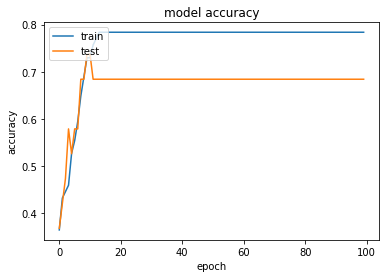

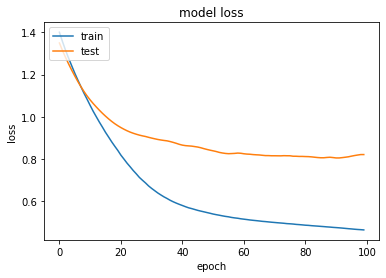

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array

le_features = LabelEncoder()
X = data_risk_group_2021_updated.drop(["Rating"], axis=1).apply(le_features.fit_transform)
y = data_risk_group_2021_updated["Rating"]
#Step 2 Split, train and test data
#Train, test and split the dataset. Random number generator, with popular integer see #numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Step 3 Preprocess the X training data by Scaling
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

#Step3.1 Apply the scaler to the X training data
X_train_std = sc.transform(X_train)
#Step 3.2 Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

No_classes = 4
y_train = np_utils.to_categorical(y_train, No_classes)
y_test  = np_utils.to_categorical(y_test, No_classes)
# Step 5 create an deep NN model
#Output layer with 8 inputs
#1 hhidden layer with 64 neurons
#Output layer with 2 neurons for 2 classes (0,1)
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
print("\n")
print("Model Summary ")
print(model.summary())
print("\n")

#Step 6 Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Step 7 Fit Model
history = model.fit(X_train_std, y_train, batch_size=50, epochs=100,verbose=1, validation_split=0.20)

#Use model for Prediction but have to transform it first
Xnew1 = array([[4,1,0,0]])
#Xnew1_std = sc.transform(Xnew1)
Xnew1_std = pd.DataFrame(Xnew1,columns=['Road user','Casualty sex','Urban rural','Built up roads'])
# make a prediction

ynew1 = np.argmax(model.predict(Xnew1_std),axis=1)

y_pred = model.predict(X_test)
# show the inputs and predicted outputs
print("\n")
print("The predicted classification for Xnew1 \n", Xnew1_std)
print("\n Is :", ynew1)
print("\n")


#Evaluate the model
score = model.evaluate(X_test_std, y_test, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)
print("The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)")
print(score)
print("\n")

# list all data in history
print(history.history.keys())
print("\n")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
data_risk_group_2021_updated

,Road user,Casualty sex,Urban rural,Built up roads,Rating
2563,Pedestrian,Unknown,Urban,Built up road,1
2564,Pedestrian,Unknown,Rural,Built up road,1
2565,Pedestrian,Male,Urban,Motorway,1
2566,Pedestrian,Male,Urban,Built up road,2
2567,Pedestrian,Male,Urban,Non built up road,1
...,...,...,...,...,...
2682,Other vehicle,Female,Urban,Built up road,1
2683,Other vehicle,Female,Urban,Non built up road,1
2684,Other vehicle,Female,Rural,Motorway,1
2685,Other vehicle,Female,Rural,Built up road,1




Model Summary 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 40)                200       
                                                                 
 dense_30 (Dense)            (None, 40)                1640      
                                                                 
 dense_31 (Dense)            (None, 4)                 164       
                                                                 
Total params: 2,024
Trainable params: 2,024
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
33/33 [==============================] - 1s 8ms/step - loss: 1.1965 - accuracy: 0.6148 - val_loss: 0.9691 - val_accuracy: 0.7370
Epoch 2/100
33/33 [

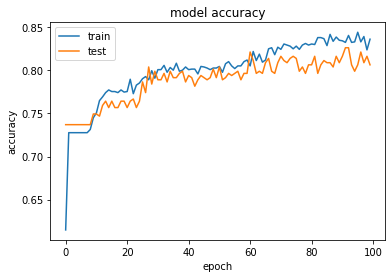

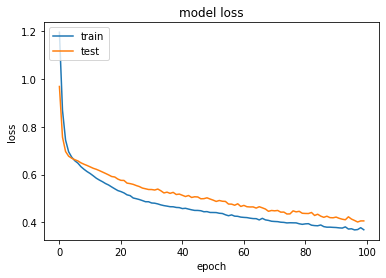

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array

le_features = LabelEncoder()
data_risk_group_updated["Rating"] = le_class.fit_transform(data_risk_group_updated["Rating"])
X = data_risk_group_updated.drop(["Rating"], axis=1).apply(le_features.fit_transform)
y = data_risk_group_updated["Rating"]
#Step 2 Split, train and test data
#Train, test and split the dataset. Random number generator, with popular integer see #numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Step 3 Preprocess the X training data by Scaling
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

#Step3.1 Apply the scaler to the X training data
X_train_std = sc.transform(X_train)
#Step 3.2 Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

No_classes = 4
y_train = np_utils.to_categorical(y_train, No_classes)
y_test  = np_utils.to_categorical(y_test, No_classes)
# Step 5 create an deep NN model
#Output layer with 8 inputs
#1 hhidden layer with 64 neurons
#Output layer with 2 neurons for 2 classes (0,1)
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
print("\n")
print("Model Summary ")
print(model.summary())
print("\n")

#Step 6 Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Step 7 Fit Model
history = model.fit(X_train_std, y_train, batch_size=50, epochs=100,verbose=1, validation_split=0.20)

#Use model for Prediction but have to transform it first
Xnew1 = array([[4,1,0,0]])
#Xnew1_std = sc.transform(Xnew1)
Xnew1_std = pd.DataFrame(Xnew1,columns=['Road user','Casualty sex','Urban rural','Built up roads'])
# make a prediction

ynew1 = np.argmax(model.predict(Xnew1_std),axis=1)

y_pred = model.predict(X_test)
# show the inputs and predicted outputs
print("\n")
print("The predicted classification for Xnew1 \n", Xnew1_std)
print("\n Is :", ynew1)
print("\n")


#Evaluate the model
score = model.evaluate(X_test_std, y_test, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)
print("The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)")
print(score)
print("\n")

# list all data in history
print(history.history.keys())
print("\n")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
X

,Road user,Casualty sex,Urban rural,Built up roads
0,6,2,3,0
1,6,2,0,0
2,6,2,0,2
3,6,2,1,2
4,6,1,3,1
...,...,...,...,...
2682,4,0,3,0
2683,4,0,3,2
2684,4,0,0,1
2685,4,0,0,0


In [ ]:
data_risk_group_updated

,Road user,Casualty sex,Urban rural,Built up roads,Rating
0,Pedestrian,Unknown,Urban,Built up road,Low Risk
1,Pedestrian,Unknown,Rural,Built up road,Low Risk
2,Pedestrian,Unknown,Rural,Non built up road,Low Risk
3,Pedestrian,Unknown,Unallocated,Non built up road,Low Risk
4,Pedestrian,Male,Urban,Motorway,Low Risk
...,...,...,...,...,...
2682,Other vehicle,Female,Urban,Built up road,Low Risk
2683,Other vehicle,Female,Urban,Non built up road,Low Risk
2684,Other vehicle,Female,Rural,Motorway,Low Risk
2685,Other vehicle,Female,Rural,Built up road,Low Risk


In [ ]:
a = data_risk_group_2021_updated['Rating'].unique()
print(sorted(a)) # in 2021 dataset doesnot have 'Extremely High' category level

[0, 1, 2]


[18] A decision tree provides a good accuracy model for predicting road causality risk levels using road user type, gender, area, and road type.




Accuracy for 80% training set and 20% test set : 0.84


[[ 1  0  0]
 [ 0 17  3]
 [ 0  1  3]]



Accuracy: 0.84

Micro Precision: 0.84
Micro Recall: 0.84
Micro F1-score: 0.84

Macro Precision: 0.81
Macro Recall: 0.87
Macro F1-score: 0.83

Weighted Precision: 0.88
Weighted Recall: 0.84
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00         1
 Medium Risk       0.94      0.85      0.89        20
   High Risk       0.50      0.75      0.60         4

    accuracy                           0.84        25
   macro avg       0.81      0.87      0.83        25
weighted avg       0.88      0.84      0.85        25



[Text(0.5, 0.9583333333333334, 'Built up roads <= 0.5\ngini = 0.372\nsamples = 99\nvalue = [1, 75, 23]\nclass = Medium Risk'),
 Text(0.3103448275862069, 0.875, 'Casualty sex <= 1.5\ngini = 0.497\nsamples = 38\nvalue = [1, 23, 14]\nclass = Medium Risk'),
 Text(0.27586206896551724, 0.7916666666666666, 'Urban rural <= 1.5\ngini = 0.533\nsamples = 29\nvalue = [1, 14, 14]\nclass = Medium Risk'),
 Text(0.1724137931034483, 0.7083333333333334, 'Urban rural <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [0, 10, 6]\nclass = Medium Risk'),
 Text(0.13793103448275862, 0.625, 'Casualty sex <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [0, 6, 6]\nclass = Medium Risk'),
 Text(0.06896551724137931, 0.5416666666666666, 'Road user <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = Medium Risk'),
 Text(0.034482758620689655, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = High Risk'),
 Text(0.10344827586206896, 0.4583333333333333, 'Road user <= 5.5\ngini = 0.278\nsamples = 6\nva

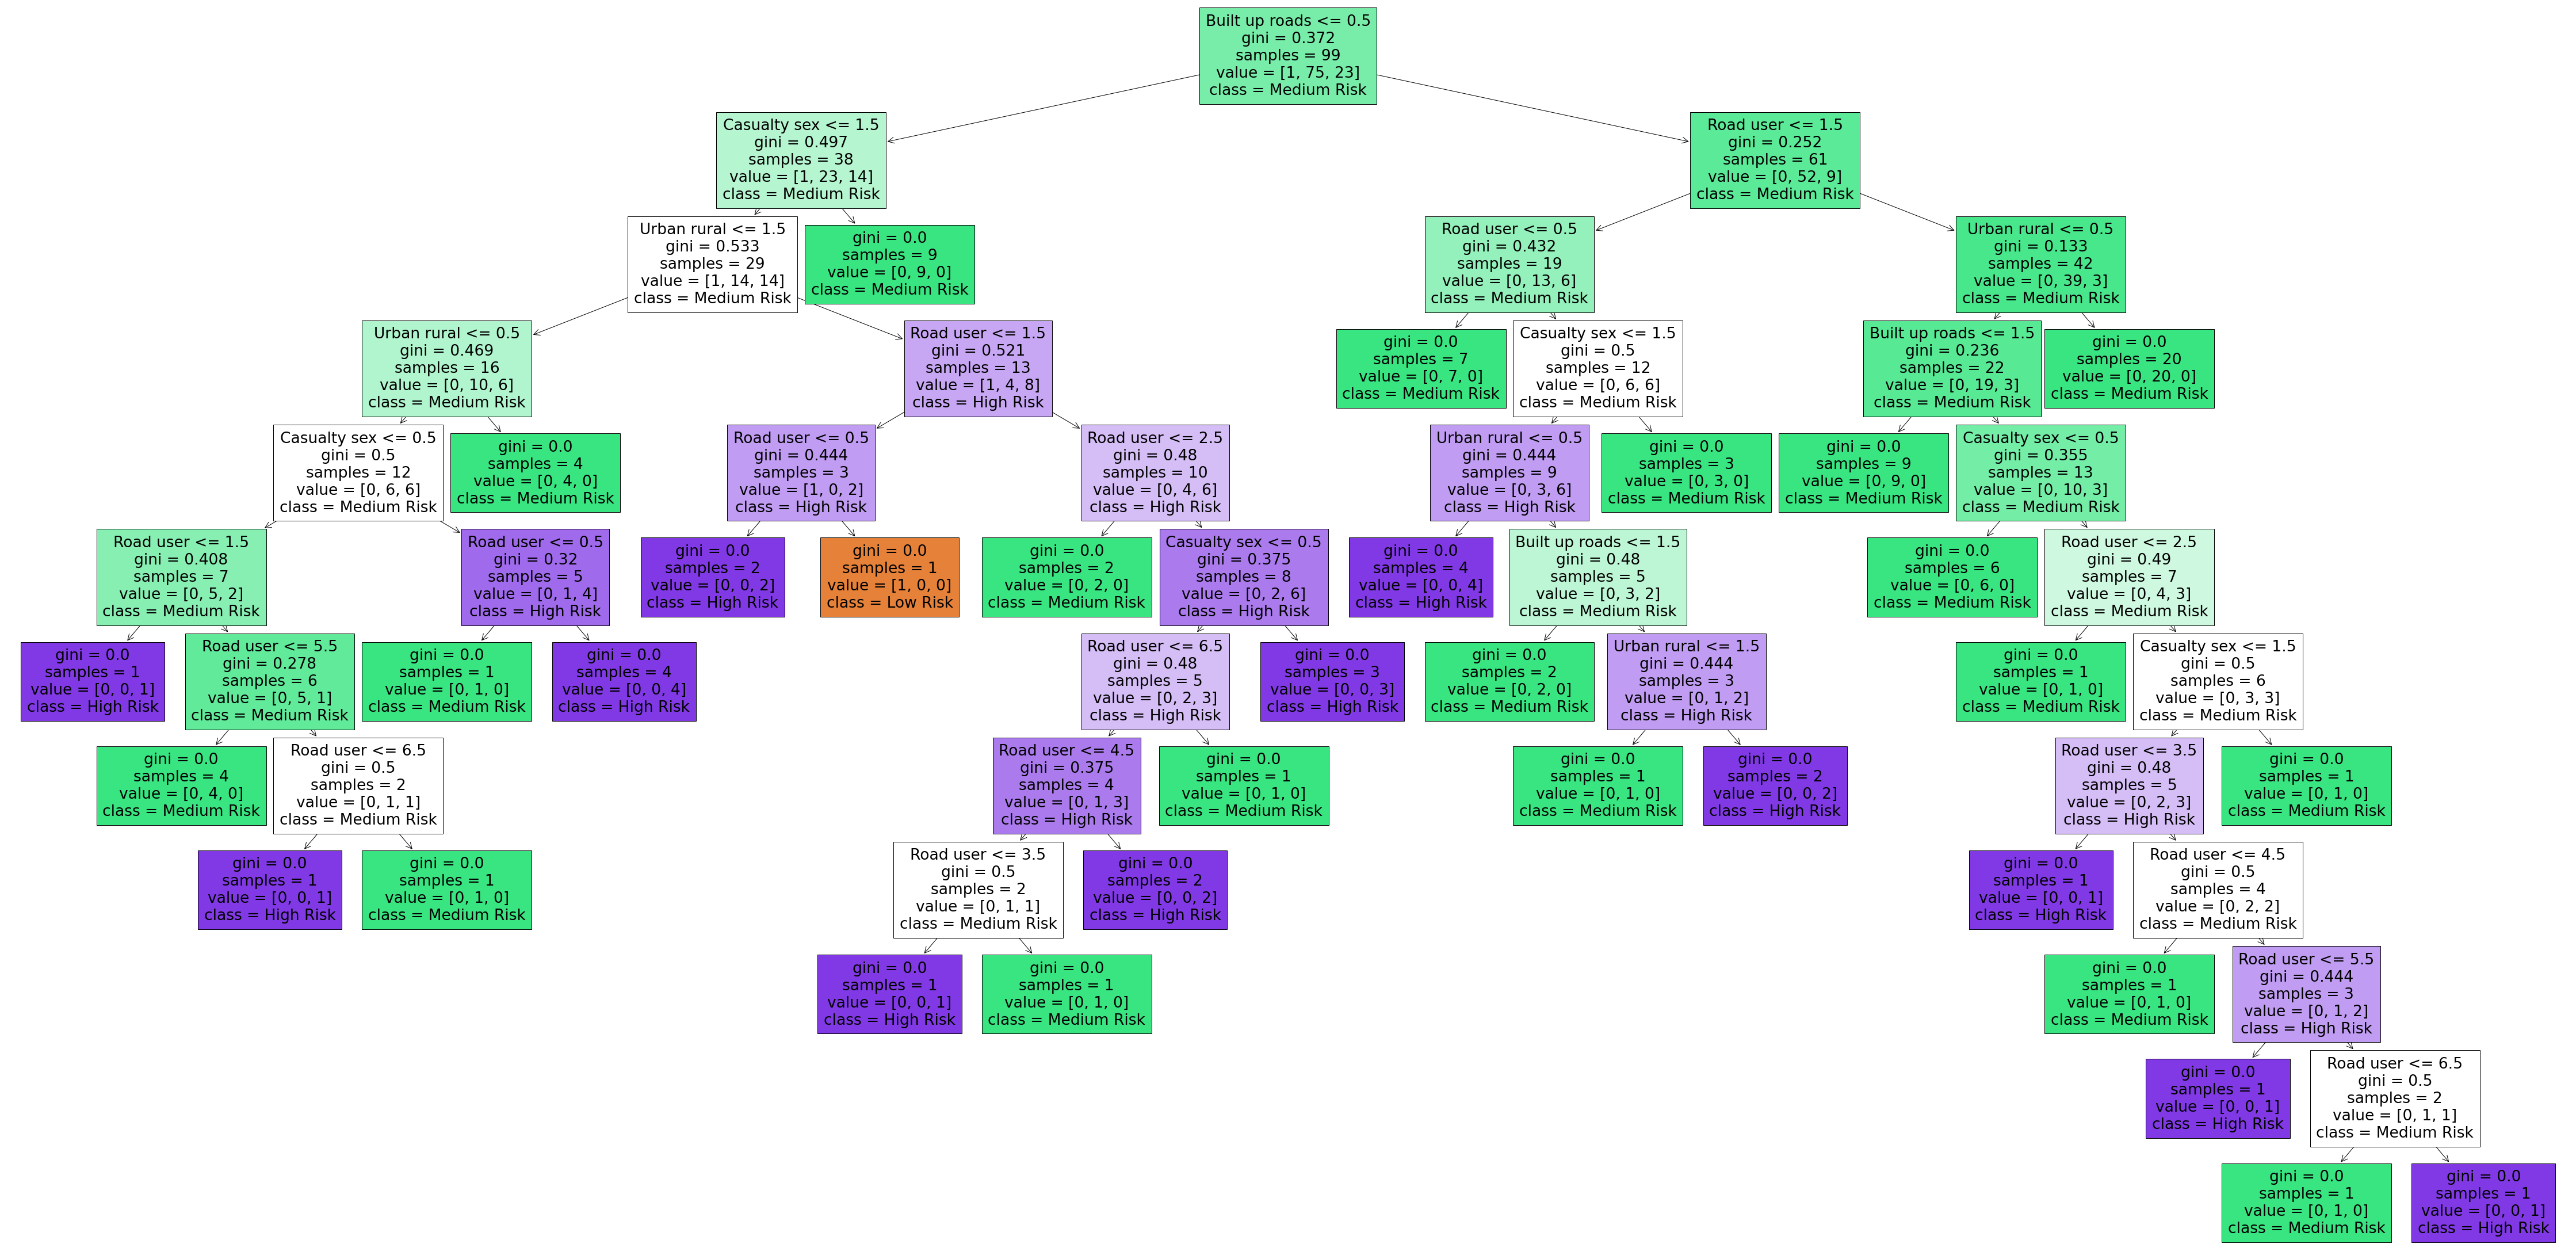

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_text

feature_cols = ['Road user', 'Casualty sex', 'Urban rural', 'Built up roads']
le_features = LabelEncoder()
X = data_risk_group_2021_updated[feature_cols].apply(le_features.fit_transform)  # Features
Y = data_risk_group_2021_updated['Rating'] # Target variable
#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test
#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Train Decision Tree Classifer

# r = export_text(clf)
# print(r)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 80% training set and 20% test set :",
          metrics.accuracy_score(y_test, y_pred))

#How to improve the accuracy of the model? By tuning the number of features for the model

#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)


print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
target_names=['Low Risk', 'Medium Risk', 'High Risk']
print(classification_report(y_test, y_pred, target_names=target_names))

#r = export_text(clf)
fig = plt.figure(figsize=(80,40))
tree.plot_tree(clf,
                   feature_names=feature_cols,
                   class_names=target_names,
                   filled=True)

Data Set 4: Data Set 5:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_casualties = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Report/Final/Casualties_Demographics.csv')
df_casualties = df_casualties.loc[:, ~df_casualties.columns.str.contains('^Unnamed')]
df_casualties.head()
df_casualties.tail()

,Road user type,Sex,Age group,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
457,Other or unknown vehicle passengers,All,40 to 49,53,41,40,36,44,38,44,30,25,24
458,Other or unknown vehicle passengers,All,50 to 59,35,24,19,25,33,38,27,26,22,17
459,Other or unknown vehicle passengers,All,60 to 69,27,15,14,17,16,18,21,14,7,5
460,Other or unknown vehicle passengers,All,70 and over,14,16,16,11,13,18,16,11,12,8
461,Other or unknown vehicle passengers,All,All ages,349,228,222,220,274,295,262,221,172,215


In [ ]:
df_casualties.shape

(462, 13)

In [ ]:
df_casualties_All_Ages = df_casualties.loc[(df_casualties["Age group"] != "All ages") & (df_casualties["Sex"] != "All")]
df_casualties_All_Ages_2021 = df_casualties_All_Ages.groupby(['Age group'])['2021'].sum().reset_index()
df_casualties_All_Ages_2021

,Age group,2021
0,16,1369
1,17 to 20,11575
2,21 to 24,11946
3,25 to 29,14458
4,30 to 39,24816
5,40 to 49,17779
6,50 to 59,15655
7,60 to 69,8552
8,70 and over,8048
9,Under 16,10880


In [ ]:
skewValue = df_casualties_All_Ages_2021.set_index("Age group").skew(axis=0)
print(skewValue)
kurt = df_casualties_All_Ages_2021.set_index("Age group").kurt(axis=0 )
print(kurt)

2021    0.285163
dtype: float64
2021    1.209706
dtype: float64


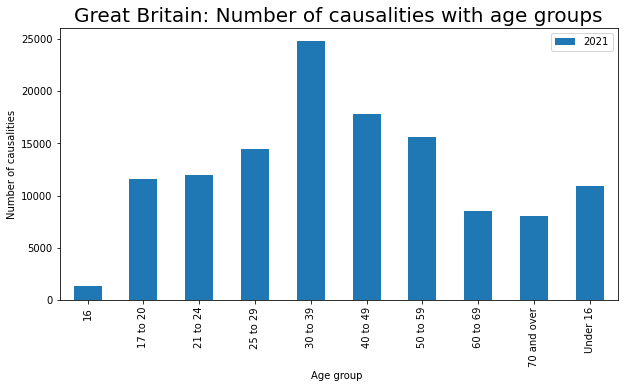

In [ ]:
df_casualties_All_Ages_2021.plot(kind='bar', x="Age group", figsize=(10, 5))
plt.title('Great Britain: Number of causalities with age groups', fontsize=20)
plt.ylabel('Number of causalities', fontsize=10)
plt.xlabel('Age group ', fontsize=10)
plt.show()

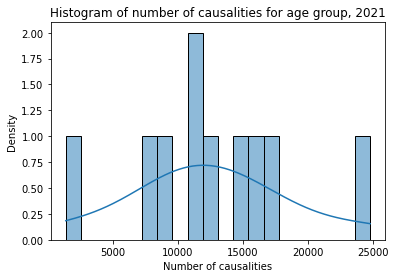

In [ ]:
import seaborn as sns
sns.histplot(df_casualties_All_Ages_2021['2021'] , bins=20, kde=True)
plt.title("Histogram of number of causalities for age group, 2021")
plt.xlabel("Number of causalities")
plt.ylabel('Density')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

In [ ]:
df_casualties_All_Ages_2021['2021']

0     1369
1    11575
2    11946
3    14458
4    24816
5    17779
6    15655
7     8552
8     8048
9    10880
Name: 2021, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_collisions = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Report/Final/Collisions_Demographics.csv')
df_collisions.head()

,Driver type,Sex,Age group,Severity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Pedal cyclists,Female,Under 16,All collisions,380,306,289,265,262,274,221,229,222,244
1,Pedal cyclists,Female,16,All collisions,37,33,48,49,29,37,24,37,45,28
2,Pedal cyclists,Female,17-20,All collisions,222,208,220,214,202,182,154,154,149,126
3,Pedal cyclists,Female,21-24,All collisions,343,367,415,363,339,302,297,252,264,250
4,Pedal cyclists,Female,25-29,All collisions,584,582,659,586,563,548,575,545,466,466


In [ ]:
df_collisions.tail()

,Driver type,Sex,Age group,Severity,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
259,All drivers and riders,All,40-49,All collisions,49369,46553,48222,45083,42293,39015,35956,33389,25216,27965
260,All drivers and riders,All,50-59,All collisions,32946,32098,35132,33826,33319,31975,30836,29104,22074,24464
261,All drivers and riders,All,60-69,All collisions,17784,17215,18588,17101,16948,15823,15248,14686,11049,12714
262,All drivers and riders,All,70 and over,All collisions,11869,12102,12947,12353,12598,12421,12469,11721,8171,9456
263,All drivers and riders,All,All ages,All collisions,265877,252913,268527,257845,252500,238926,226409,216381,167375,186443


In [ ]:
df_collisions.shape

(264, 14)

In [ ]:
df_collisions_All_Ages = df_collisions.loc[(df_collisions["Age group"] != "All ages") & (df_collisions["Sex"] != "All") & (df_collisions["Driver type"] != "All drivers and riders")]
df_collisions_All_Ages_2021 = df_collisions_All_Ages.groupby(['Age group'])['2021'].sum().reset_index()
df_collisions_All_Ages_2021

,Age group,2021
0,16,662
1,17-20,11095
2,21-24,14176
3,25-29,18889
4,30-39,36395
5,40-49,27369
6,50-59,24131
7,60-69,12580
8,70 and over,9361
9,Under 16,2014


[6]The 30-39 year old age groups are the most vulnerable age group in the UK in terms of road collisions and fatalities, considering the latest records in 2021.


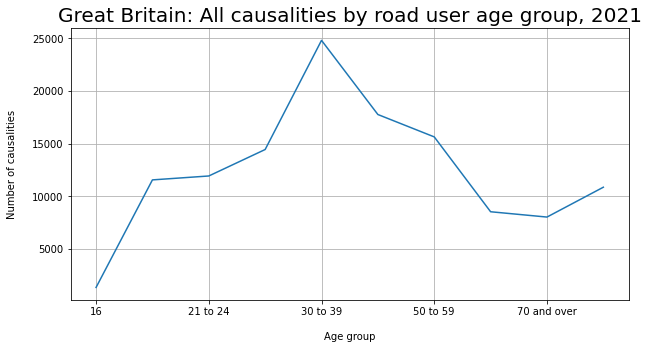

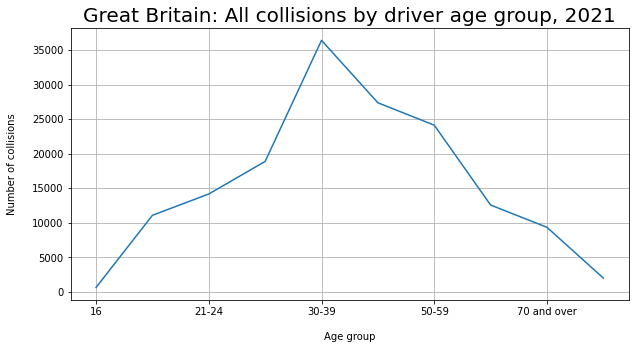

In [ ]:
df_casualties_All_Ages_2021.plot(x="Age group", figsize=(10, 5))
plt.title('Great Britain: All causalities by road user age group, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.gca().legend_.remove()
plt.xlabel("Age group", labelpad=15)
plt.ylabel("Number of causalities", labelpad=15)
plt.grid()
plt.show()
df_collisions_All_Ages_2021.plot(x="Age group", figsize=(10, 5))
plt.title('Great Britain: All collisions by driver age group, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.gca().legend_.remove()
plt.xlabel("Age group", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.show()

[7] Car drivers are the most vulnerable group of drivers in the UK in terms of road fatalities and collisions, regardless of age.


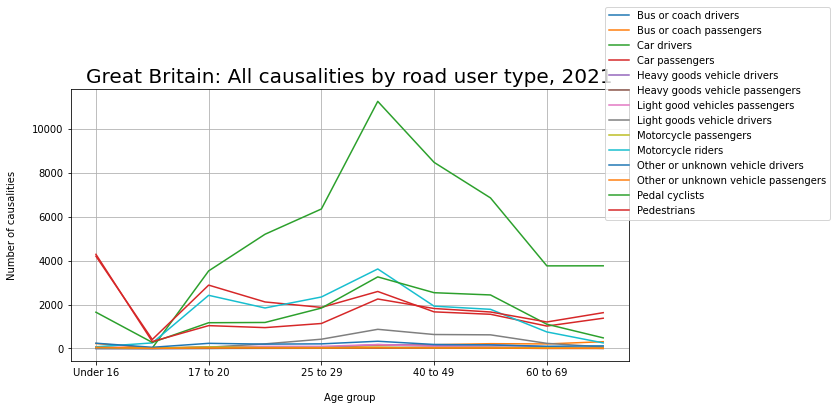

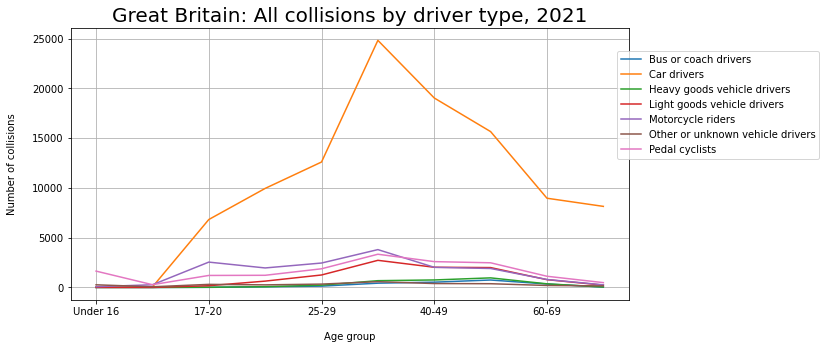

In [ ]:
df_casualties_Road_User_2021 = df_casualties_All_Ages.groupby(['Age group','Road user type'])['2021'].sum().reset_index()
df_casualties_Road_User_2021 = df_casualties_Road_User_2021.pivot(index='Age group', columns='Road user type', values='2021')
df_casualties_Road_User_2021 = df_casualties_Road_User_2021.reindex(['Under 16','16','17 to 20','21 to 24','25 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 and over']).reset_index(0)

df_collisions_Road_User_2021 = df_collisions_All_Ages.groupby(['Age group','Driver type'])['2021'].sum().reset_index()
df_collisions_Road_User_2021 = df_collisions_Road_User_2021.pivot(index='Age group', columns='Driver type', values='2021')
df_collisions_Road_User_2021 = df_collisions_Road_User_2021.reindex(['Under 16','16','17-20','21-24','25-29','30-39','40-49','50-59','60-69','70 and over']).reset_index()

df_casualties_Road_User_2021.plot(x="Age group", figsize=(10, 5))
plt.title('Great Britain: All causalities by road user type, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Age group", labelpad=15)
plt.ylabel("Number of causalities", labelpad=15)
plt.grid()
plt.show()

df_collisions_Road_User_2021.plot(x="Age group", figsize=(10, 5))
plt.title('Great Britain: All collisions by driver type, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Age group", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.show()

In [ ]:
df_collisions_Road_User_2021

Driver type,Age group,Bus or coach drivers,Car drivers,Heavy goods vehicle drivers,Light goods vehicle drivers,Motorcycle riders,Other or unknown vehicle drivers,Pedal cyclists
0,Under 16,0,26,0,3,77,266,1642
1,16,0,47,0,0,271,67,277
2,17-20,10,6828,21,174,2547,309,1206
3,21-24,70,9955,73,636,1960,260,1222
4,25-29,132,12608,229,1253,2454,337,1876
5,30-39,429,24838,680,2726,3803,580,3339
6,40-49,531,19045,753,2029,2023,392,2596
7,50-59,747,15666,962,1997,1906,375,2478
8,60-69,344,8968,364,782,800,198,1124
9,70 and over,40,8149,39,231,262,155,485


[8]Pedal cyclists are the most vulnerable driver type among the under-16 age group because they are the most popular among the group.


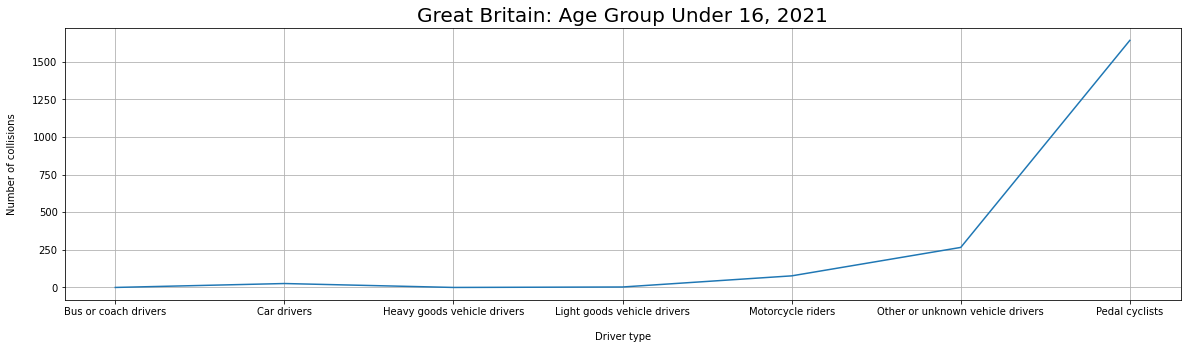

In [ ]:
df_collisions_Under_16 = df_collisions_Road_User_2021.loc[(df_collisions_Road_User_2021["Age group"] == "Under 16")].drop(columns='Age group')
df_collisions_Under_16.T.plot(figsize=(20, 5))
plt.title('Great Britain: Age Group Under 16, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Driver type", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.gca().legend_.remove()
plt.show()

[9]Motorcycle riders, the most vulnerable driver group, are 16-year-olds because motorcycles are the most popular among the group.


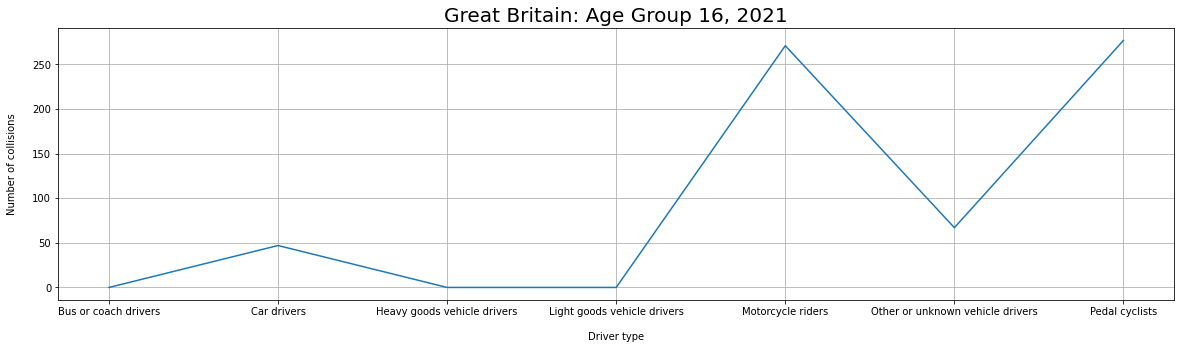

In [ ]:
df_collisions_Under_16 = df_collisions_Road_User_2021.loc[(df_collisions_Road_User_2021["Age group"] == "16")].drop(columns='Age group')
df_collisions_Under_16.T.plot(figsize=(20, 5))
plt.title('Great Britain: Age Group 16, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Driver type", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.gca().legend_.remove()
plt.show()

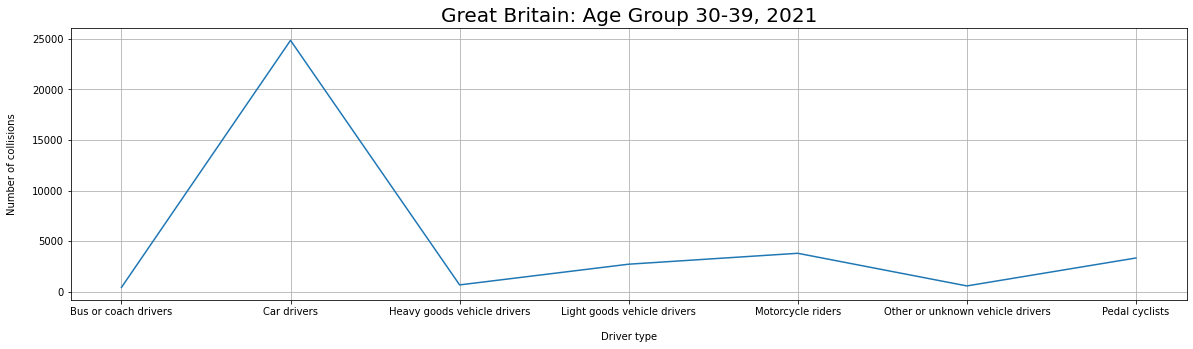

In [ ]:
df_collisions_Under_16 = df_collisions_Road_User_2021.loc[(df_collisions_Road_User_2021["Age group"] == "30-39")].drop(columns='Age group')
df_collisions_Under_16.T.plot(figsize=(20, 5))
plt.title('Great Britain: Age Group 30-39, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Driver type", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.gca().legend_.remove()
plt.show()

[10]Car drivers are the most vulnerable driver group, in 30-39 age group and other ages.


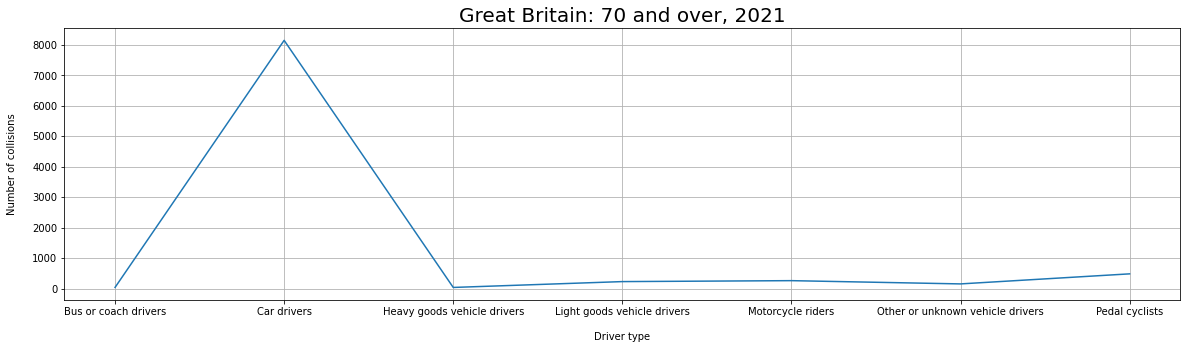

In [ ]:
df_collisions_Under_16 = df_collisions_Road_User_2021.loc[(df_collisions_Road_User_2021["Age group"] == "70 and over")].drop(columns='Age group')
df_collisions_Under_16.T.plot(figsize=(20, 5))
plt.title('Great Britain: 70 and over, 2021', fontsize=20)
plt.legend(loc='lower center', bbox_to_anchor=(1.16, 0.5))
plt.xlabel("Driver type", labelpad=15)
plt.ylabel("Number of collisions", labelpad=15)
plt.grid()
plt.gca().legend_.remove()
plt.show()

In [ ]:
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "17-20", "Age group"] = "17 to 20"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "21-24", "Age group"] = "21 to 24"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "25-29", "Age group"] = "25 to 29"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "30-39", "Age group"] = "30 to 39"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "40-49", "Age group"] = "40 to 49"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "50-59", "Age group"] = "50 to 59"
df_collisions_All_Ages_2021.loc[df_collisions_All_Ages_2021["Age group"] == "60-69", "Age group"] = "60 to 69"
df_collisions_All_Ages_2021
df_collisions_All_Ages_2021 = df_collisions_All_Ages_2021.rename(columns={'2021': '2021_col'})
df_casualties_All_Ages_2021 =  df_casualties_All_Ages_2021.rename(columns={'2021': '2021_cas'})
df_collisions_casualties_All_Ages_merge = pd.merge(df_collisions_All_Ages_2021, df_casualties_All_Ages_2021, on='Age group')
df_collisions_casualties_All_Ages_merge

,Age group,2021_col,2021_cas
0,16,662,1369
1,17 to 20,11095,11575
2,21 to 24,14176,11946
3,25 to 29,18889,14458
4,30 to 39,36395,24816
5,40 to 49,27369,17779
6,50 to 59,24131,15655
7,60 to 69,12580,8552
8,70 and over,9361,8048
9,Under 16,2014,10880


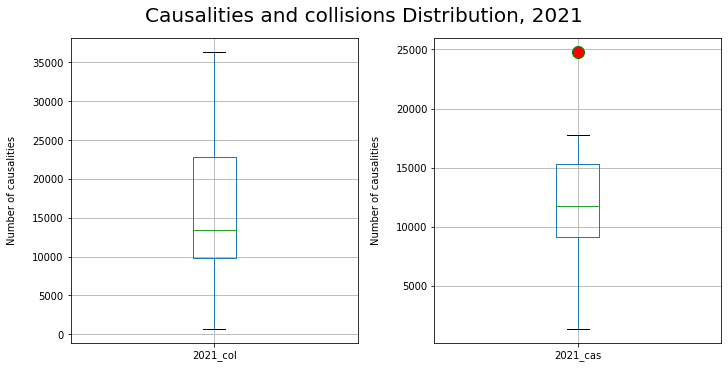

In [ ]:
ncols = 2
nrows = 1

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
for col, ax in zip(df_collisions_casualties_All_Ages_merge.drop(columns=["Age group"]).columns, axs.T.ravel()):
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
    df_collisions_casualties_All_Ages_merge[[col]].boxplot(ax=ax, flierprops=flierprops);
    ax.set_ylabel('Number of causalities',labelpad=15)

fig.suptitle('Causalities and collisions Distribution, 2021', fontsize=20)
fig.set_size_inches(10, 5)

   2021_cas
2     11946
4     24816
7      8552
6     15655
0      1369
1     11575


   2021_col
2     14176
4     36395
7     12580
6     24131
0       662
1     11095


   2021_cas
8      8048
3     14458
9     10880
5     17779


The predicted Y value for causalities = 8000 is:  [[9827.64504488]]
Coefficients: 
 [[1.54644888]]


Mean squared error:  39372155.04990101
Coefficient of determination:  0.5710513957765284


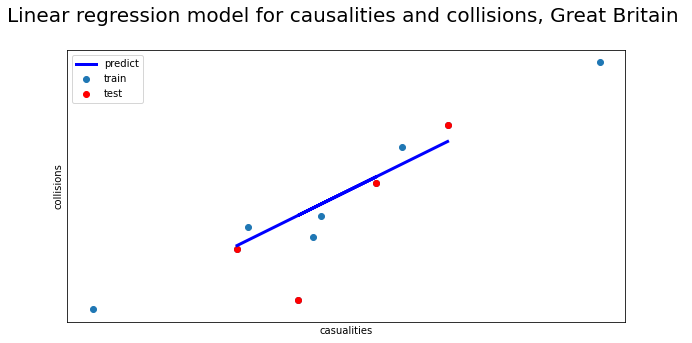

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.lines import Line2D

#Use only 1 feature - AGE to predict the target Y
cas_x = df_collisions_casualties_All_Ages_merge[['2021_cas']]
col_y = df_collisions_casualties_All_Ages_merge[['2021_col']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(cas_x, col_y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(cas_x, col_y,test_size=0.4)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)


#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train.to_numpy(), y_train.to_numpy())

# Make predictions using the testing set
y_pred = regr.predict(x_test.to_numpy())
y_pred2 = regr.predict([[8000]])
print("\n")
print("The predicted Y value for causalities = 8000 is: ", y_pred2)

# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))

 # Plot outputs
plt.scatter(x_test, y_test,  color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.ylabel('collisions', fontsize=10)
plt.xlabel('casualities', fontsize=10)
plt.title('Linear regression model for causalities and collisions, Great Britain \n', fontsize=20)
plt.legend(["predict" , "train", "test"])
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
df_collisions_casualties_All_Ages_merge = df_collisions_casualties_All_Ages_merge.set_index('Age group')
correlation = df_collisions_casualties_All_Ages_merge.corr(method='pearson')
correlation

,2021_col,2021_cas
2021_col,1.000000,0.919989
2021_cas,0.919989,1.000000


In [ ]:
df_collisions_casualties_All_Ages_merge

,2021_col,2021_cas
Age group,,
16,662,1369
17 to 20,11095,11575
21 to 24,14176,11946
25 to 29,18889,14458
30 to 39,36395,24816
40 to 49,27369,17779
50 to 59,24131,15655
60 to 69,12580,8552
70 and over,9361,8048


In [ ]:
df_collisions_casualties_All_Ages_merge. describe()

,2021_col,2021_cas
count,10.00000,10.000000
mean,15667.20000,12507.800000
std,11217.95818,6293.135481
min,662.00000,1369.000000
25%,9794.50000,9134.000000
50%,13378.00000,11760.500000
75%,22820.50000,15355.750000
max,36395.00000,24816.000000


In [ ]:
from scipy import stats
stats.ttest_1samp(df_collisions_casualties_All_Ages_merge['2021_cas'], 0)

Ttest_1sampResult(statistic=6.2851239480685335, pvalue=0.00014349934404667546)

In [ ]:
col_2021 = df_collisions_casualties_All_Ages_merge['2021_col']
cas_2021 = df_collisions_casualties_All_Ages_merge['2021_cas']
print(col_2021.mean())
print(cas_2021.mean())
stats.ttest_ind(col_2021, cas_2021)


15667.2
12507.8


Ttest_indResult(statistic=0.776741115378785, pvalue=0.4473993713961305)